# Duluth Complex code introduction

This notebook plots contains data analysis and visualization associated with the manuscript

**Rapid emplacement of the massive Duluth Complex intrusions within the Midcontinent Rift**

Corresponding Author: Nicholas L. Swanson-Hysell (swanson-hysell@berkeley.edu)

# Import scientific Python modules

In [1]:
import pmagpy.pmag as pmag
import pmagpy.pmagplotlib as pmagplotlib
import pmagpy.ipmag as ipmag

import mplstereonet

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [2]:
from cartopy import config
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io import img_tiles
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
lakes_10m = cfeature.NaturalEarthFeature('physical', 'lakes', '10m',
                                        edgecolor='face',
                                        facecolor=cfeature.COLORS['water'])
lakes_50m = cfeature.NaturalEarthFeature('physical', 'lakes', '50m',
                                        edgecolor='face',
                                        facecolor=cfeature.COLORS['water'])
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor=cfeature.COLORS['land'])

states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')

Laurentia_outline = ShapelyFeature(Reader('../data/Laurentia_shape/Laurentia.shp').geometries(),
                                ccrs.PlateCarree(), facecolor = 'none', edgecolor='black')

# Duluth Complex paleomagnetic data compilation

Beck (1970) published results from intrusive rocks of the Midcontinent Rift in northern Minnesota including the Duluth Complex. The details of the site mean directions, site locations and lithologies are available within Beck's PhD thesis that was published in 1969. These data can be assigned to intrusive units associated with more recent mapping efforts (Miller et al., 2001) and include abundant data from the anorthositic and layered series of the Duluth Complex.

*Beck Jr, M.E., 1970. Paleomagnetism of Keweenawan intrusive rocks, Minnesota. Journal of Geophysical Research, 75(26), pp. 4985-4996.*

The Beck (1970) study utilized blanket alternating field demagnetization steps of 7.5, 15 and 30 mT and chose to use the directions associated with the step where there was the highest concentration of directions. Given that Midcontinent Rift magnetizations are typically single-component, it is likely that this approach yielded acceptable site mean directions.

## Import and plot the Beck (1970) sites from the Duluth Complex

In [3]:
Beck1969a_sites = pd.read_csv('../data/pmag_compiled/Beck1969a_sites.txt',sep='\t',header=1)
Beck_Anorthositic_series = Beck1969a_sites[Beck1969a_sites['location'] == 'Anorthositic series']
Beck_Layered_series = Beck1969a_sites[Beck1969a_sites['location'] == 'Layered series']

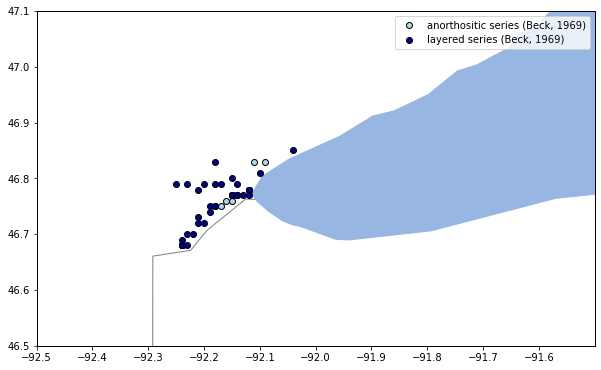

In [4]:
central_lat = 46.75
central_lon = -92
extent = [central_lon-0.5, central_lon+0.5, central_lat-0.25, central_lat+0.25]

plt.figure(1,(10,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(extent)
plt.scatter(Beck_Anorthositic_series.lon, Beck_Anorthositic_series.lat,transform=ccrs.PlateCarree(),zorder=100,
            color = 'lightblue', edgecolors='black',label='anorthositic series (Beck, 1969)')
plt.scatter(Beck_Layered_series.lon, Beck_Layered_series.lat,transform=ccrs.PlateCarree(),zorder=100,
            color = 'darkblue', edgecolors='black',label='layered series (Beck, 1969)')

ax.coastlines(resolution='10m')
ax.add_feature(states_provinces, edgecolor='gray')
ax.add_feature(lakes_10m)

ax.set_xticks(np.arange(-92.5,-91.6,0.1).tolist(), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(46.5,47.1,0.1).tolist(), crs=ccrs.PlateCarree())
plt.legend()
plt.show()

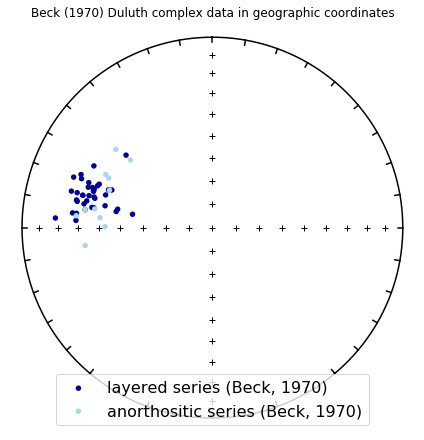

In [5]:
plt.figure(figsize=(6,6))
ipmag.plot_net()
ipmag.plot_di(Beck_Layered_series['dir_dec'].tolist(),
              Beck_Layered_series['dir_inc'].tolist(),color='darkblue',
              label='layered series (Beck, 1970)',markersize=30)
ipmag.plot_di(Beck_Anorthositic_series['dir_dec'].tolist(),
              Beck_Anorthositic_series['dir_inc'].tolist(),color='lightblue',
              label='anorthositic series (Beck, 1970)',markersize=30)
plt.legend(loc=8,fontsize=16)
plt.title('Beck (1970) Duluth complex data in geographic coordinates')
plt.show()

## Conduct common mean tests between the layered series and anorthositic series data

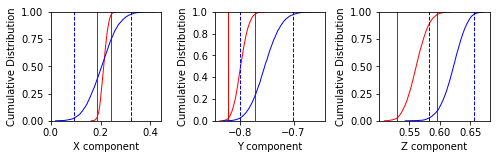

Results of Watson V test: 

Watson's V:           2.1
Critical value of V:  6.6
"Pass": Since V is less than Vcrit, the null hypothesis
that the two populations are drawn from distributions
that share a common mean direction can not be rejected.

M&M1990 classification:

Angle between data set means: 4.4
Critical angle for M&M1990:   7.8
The McFadden and McElhinny (1990) classification for
this test is: 'B'


(1, 4.389215518800642, 7.81520991416335)

In [6]:
Beck_Layered_block = ipmag.make_di_block(Beck_Layered_series['dir_dec'].tolist(),
                                         Beck_Layered_series['dir_inc'].tolist())
Beck_Anortho_block = ipmag.make_di_block(Beck_Anorthositic_series['dir_dec'].tolist(),
                                         Beck_Anorthositic_series['dir_inc'].tolist())
ipmag.common_mean_bootstrap(Beck_Layered_block,Beck_Anortho_block)
ipmag.common_mean_watson(Beck_Layered_block,Beck_Anortho_block)

## M181 Duluth Heights orientation data

In [7]:
# import structural measurements from published map data
Duluth_Heights_structural_data = pd.read_csv('../data/intrusive_orientations/Duluth_Heights_orientations.csv',sep=',')
Duluth_Heights = Duluth_Heights_structural_data[(Duluth_Heights_structural_data.STRUCTURE == 'IL') | (Duluth_Heights_structural_data.STRUCTURE == 'IM') 
                                              | (Duluth_Heights_structural_data.STRUCTURE == 'IU') | (Duluth_Heights_structural_data.STRUCTURE == 'IT')]

In [8]:
Duluth_Heights = Duluth_Heights[Duluth_Heights.Y < 5183000]
Duluth_Heights = Duluth_Heights[Duluth_Heights['DIP_PLUNGE']<35]

In [9]:
Duluth_Heights['strike'] = Duluth_Heights['DIPD_TREND'] - 90
Duluth_Heights['pole_trend'] = Duluth_Heights['DIPD_TREND'] - 180
Duluth_Heights['pole_plunge'] = 90 - Duluth_Heights['DIP_PLUNGE']
mean_plane_pole = ipmag.fisher_mean(Duluth_Heights['pole_trend'].tolist(),Duluth_Heights['pole_plunge'].tolist())
mean_strike = mean_plane_pole['dec'] + 90
mean_dip = 90 - mean_plane_pole['inc']
print(mean_strike, mean_dip)

367.9513341883158 16.344796403566036


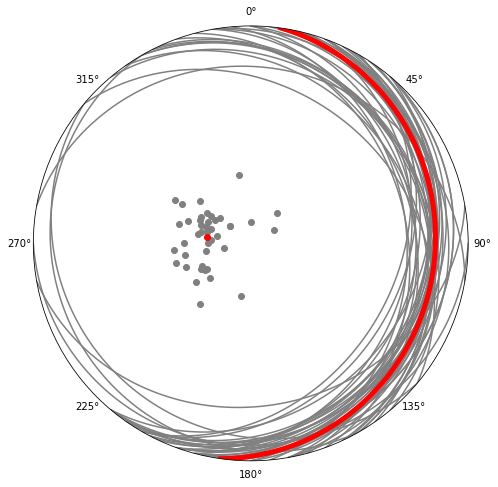

In [10]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')
ax.plane(Duluth_Heights['strike'],Duluth_Heights['DIP_PLUNGE'],color='grey')
ax.plane(mean_strike,mean_dip,color='red',linewidth=5)
ax.pole(Duluth_Heights['strike'],Duluth_Heights['DIP_PLUNGE'],color='grey')
ax.pole(mean_strike,mean_dip,color='red')

plt.show()

## Plotting M183 West Duluth map orientations

Here we are plotting the igneous layering, igneous modal or texture layering

In [11]:
# import structural measurements from published map data
West_Duluth_structural_data = pd.read_csv('../data/intrusive_orientations/West_Duluth_orientations.csv',sep=',')
West_Duluth = West_Duluth_structural_data[(West_Duluth_structural_data.STRUCTURE == 'IL') | (West_Duluth_structural_data.STRUCTURE == 'IM') 
                                              | (West_Duluth_structural_data.STRUCTURE == 'IU') | (West_Duluth_structural_data.STRUCTURE == 'IT')]
West_Duluth

,Y,X,ValueId,PolyId,AREA,PERIMETER,WDUL_STRPT,WDUL_STR_1,TYPE,GCM_CODE,GEOC_SRC,GEOC_DATE,FIELD_STA,MEAS_ID,MEAS_DATE,GEOL_1,GEOL_2,REFRNCE,STRUCTURE,STRUC_TYPE,DIPD_TREND,DIP_PLUNGE,MRR_RELIAB,N_MEAS,SYM_CODE,DISPLAY,AVANGLE
9,5.169831e+06,558799.132850,10,0,0.0,0.0,10,10,ST,A,MGS,20080615,NaN,MD739.5,20031007,JDM,NaN,NB:MD4/FM:WD5585E/51705N,IM,P,80,45,NaN,1,73,24000,280
10,5.169874e+06,558554.535103,11,0,0.0,0.0,11,11,ST,A,MGS,20080615,NaN,MD587.00.2,19971015,JDM,NaN,NB:MD4/FM:223B.SW2,IM,P,59,24,NaN,1,73,24000,301
11,5.169972e+06,558275.324686,12,0,0.0,0.0,12,12,ST,A,MGS,20080615,NaN,MD591.00.2,19971015,JDM,NaN,NB:MD4/FM:223B.SW2,IM,P,70,34,NaN,0,73,24000,290
12,5.170077e+06,558949.574927,13,0,0.0,0.0,13,13,ST,A,MGS,20080615,NaN,MD736.3,20031007,JDM,NaN,NB:MD4/FM:WD5585E/51705N,IM,P,75,49,NaN,1,73,24000,285
13,5.170094e+06,558419.712396,14,0,0.0,0.0,14,14,ST,A,MGS,20080615,NaN,MD555.00.1,19941021,JDM,NaN,NB:DM3/FM:223B.SW2,IT,P,63,37,NaN,1,73,24000,297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,5.177305e+06,562249.038259,183,0,0.0,0.0,183,183,ST,A,MGS,20080615,NaN,MD205.00.2,19920819,JDM,NaN,NB:DM2/FM:223B.NC1,IT,P,65,35,NaN,1,73,24000,295
183,5.177331e+06,561145.444574,184,0,0.0,0.0,184,184,ST,A,MGS,20080615,NaN,MD189.00.1,19920814,JDM,NaN,NB:DM2/FM:223B.NC1,IL,P,90,10,NaN,1,103,24000,270
184,5.177455e+06,561363.004356,185,0,0.0,0.0,185,185,ST,A,MGS,20080615,NaN,MD648.1,19971021,JDM,NaN,NB:MD4/FM:223B.NC,IM,P,128,15,NaN,1,73,12000,232
185,5.177605e+06,562167.927481,186,0,0.0,0.0,186,186,ST,A,MGS,20080615,NaN,MD202.00.1,19920819,JDM,NaN,NB:DM2/FM:223B.NC1,IL,P,129,19,NaN,1,103,24000,231


In [12]:
West_Duluth = West_Duluth[West_Duluth['DIP_PLUNGE']<35]

In [13]:
West_Duluth['strike'] = West_Duluth['DIPD_TREND'] - 90
West_Duluth['pole_trend'] = West_Duluth['DIPD_TREND'] - 180
West_Duluth['pole_plunge'] = 90 - West_Duluth['DIP_PLUNGE']
mean_plane_pole = ipmag.fisher_mean(West_Duluth['pole_trend'].tolist(),West_Duluth['pole_plunge'].tolist())
mean_strike = mean_plane_pole['dec'] + 90
mean_dip = 90 - mean_plane_pole['inc']
print(mean_strike, mean_dip)

351.92633364731483 18.271165297678067


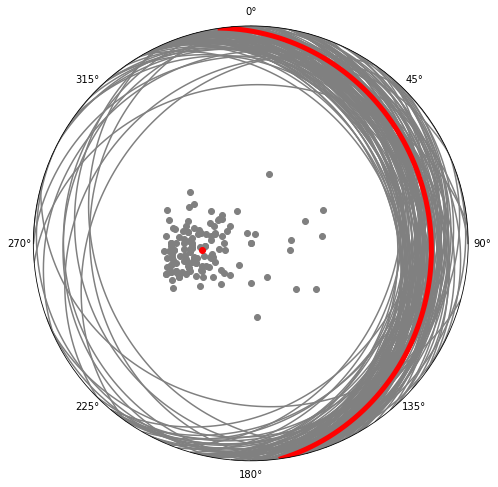

In [14]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')
ax.plane(West_Duluth['strike'],West_Duluth['DIP_PLUNGE'],color='grey')
ax.plane(mean_strike,mean_dip,color='red',linewidth=5)
ax.pole(West_Duluth['strike'],West_Duluth['DIP_PLUNGE'],color='grey')
ax.pole(mean_strike,mean_dip,color='red')

plt.show()

## Plotting M182 Duluth map orientations

Here we are plotting orientations from North Shore Volcanic Group lavas overlying the Duluth Complex to compare the mean orientation to that of the igneous foliations compiled above. They show good consistency in the overall orientation. 

In [15]:
# import structural measurements from published map data
Duluth_structural_data = pd.read_csv('../data/intrusive_orientations/Duluth_orientations.csv',sep=',')
Duluth = Duluth_structural_data[(Duluth_structural_data.STRUCTURE == 'VF') | (Duluth_structural_data.STRUCTURE == 'SB') 
                                | (Duluth_structural_data.STRUCTURE == 'VC') | (Duluth_structural_data.STRUCTURE == 'VB') 
                                | (Duluth_structural_data.STRUCTURE == 'JJ')]

There are a few steep outliers (both in dip direction and dip that can be filtered out.

In [16]:
Duluth = Duluth[Duluth['DIP_PLUNGE']<35]

In [17]:
Duluth['strike'] = Duluth['DIPD_TREND'] - 90
Duluth['pole_trend'] = Duluth['DIPD_TREND'] - 180
Duluth['pole_plunge'] = 90 - Duluth['DIP_PLUNGE']
mean_plane_pole = ipmag.fisher_mean(Duluth['pole_trend'].tolist(),Duluth['pole_plunge'].tolist())
mean_strike = mean_plane_pole['dec'] + 90
mean_dip = 90 - mean_plane_pole['inc']
print(mean_strike, mean_dip)

369.7403758826295 18.386093074433518


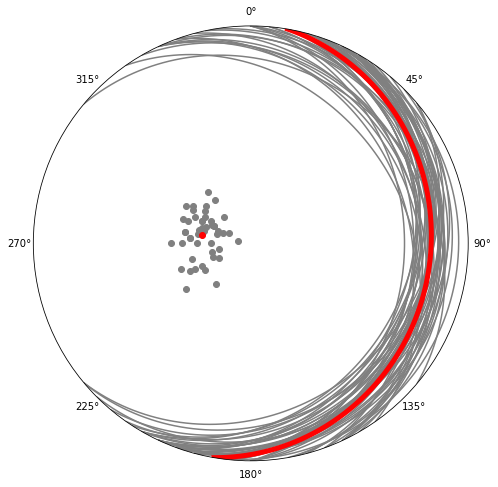

In [18]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')
ax.plane(Duluth['strike'],Duluth['DIP_PLUNGE'],color='grey')
ax.plane(mean_strike,mean_dip,color='red',linewidth=5)
ax.pole(Duluth['strike'],Duluth['DIP_PLUNGE'],color='grey')
ax.pole(mean_strike,mean_dip,color='red')

plt.show()

## Tilt correct the data

We can combine the structural measurements from West Duluth and Duluth Heights to calculate an overall mean direction that can be used to tilt correct the paleomagnetic site data.

In [19]:
Duluth_mean_plane_pole = ipmag.fisher_mean(West_Duluth['pole_trend'].tolist()+Duluth_Heights['pole_trend'].tolist(),
                                    West_Duluth['pole_plunge'].tolist()+Duluth_Heights['pole_plunge'].tolist())
Duluth_mean_strike = Duluth_mean_plane_pole['dec'] + 90
Duluth_mean_dip = 90 - Duluth_mean_plane_pole['inc']
print(Duluth_mean_strike, Duluth_mean_dip)

355.488656622132 17.69040648835825


In [20]:
tilt_correction_dd = Duluth_mean_strike + 90
tilt_correction_dip = Duluth_mean_dip

Beck_Anorthositic_series['dec_tc'] = [pmag.dotilt(Beck_Anorthositic_series['dir_dec'].tolist()[i], Beck_Anorthositic_series['dir_inc'].tolist()[i], tilt_correction_dd, tilt_correction_dip)[0] 
                                      for i in range(len(Beck_Anorthositic_series['dir_dec']))]
Beck_Anorthositic_series['inc_tc'] = [pmag.dotilt(Beck_Anorthositic_series['dir_dec'].tolist()[i], Beck_Anorthositic_series['dir_inc'].tolist()[i], tilt_correction_dd, tilt_correction_dip)[1] 
                                      for i in range(len(Beck_Anorthositic_series['dir_dec']))]
Beck_Layered_series['dec_tc'] = [pmag.dotilt(Beck_Layered_series['dir_dec'].tolist()[i], Beck_Layered_series['dir_inc'].tolist()[i], tilt_correction_dd, tilt_correction_dip)[0] 
                                      for i in range(len(Beck_Layered_series['dir_dec']))]
Beck_Layered_series['inc_tc'] = [pmag.dotilt(Beck_Layered_series['dir_dec'].tolist()[i], Beck_Layered_series['dir_inc'].tolist()[i], tilt_correction_dd, tilt_correction_dip)[1] 
                                      for i in range(len(Beck_Layered_series['dir_dec']))]

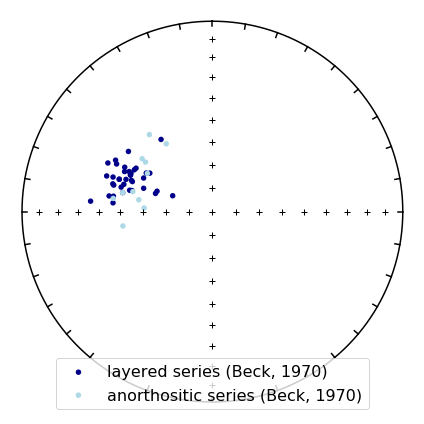

In [21]:
plt.figure(figsize=(6,6))
ipmag.plot_net()
ipmag.plot_di(Beck_Layered_series['dec_tc'].tolist(),
              Beck_Layered_series['inc_tc'].tolist(),color='darkblue',
              label='layered series (Beck, 1970)',markersize=30)
ipmag.plot_di(Beck_Anorthositic_series['dec_tc'].tolist(),
              Beck_Anorthositic_series['inc_tc'].tolist(),color='lightblue',
              label='anorthositic series (Beck, 1970)',markersize=30)
plt.legend(loc=8,fontsize=16)
# plt.savefig('./code_output/Beck_site_directions.pdf')
plt.show()

In [22]:
Beck_Anorthositic_series_tilt_corrected = ipmag.vgp_calc(Beck_Anorthositic_series, tilt_correction='yes',
    site_lon='lon',
    site_lat='lat',
    dec_is='dir_dec',
    inc_is='dir_inc',
    dec_tc='dec_tc',
    inc_tc='inc_tc',
)

Beck_Layered_series_tilt_corrected = ipmag.vgp_calc(Beck_Layered_series, tilt_correction='yes',
    site_lon='lon',
    site_lat='lat',
    dec_is='dir_dec',
    inc_is='dir_inc',
    dec_tc='dec_tc',
    inc_tc='inc_tc',
)

In [23]:
Beck_Layered_series_tilt_corrected['dir_alpha95'] = 140/np.sqrt(Beck_Layered_series_tilt_corrected['dir_k']*Beck_Layered_series_tilt_corrected['dir_n_specimens'])
Beck_Layered_filtered = Beck_Layered_series_tilt_corrected[Beck_Layered_series_tilt_corrected['dir_alpha95']<15]

Beck_Anorthositic_series_tilt_corrected['dir_alpha95'] = 140/np.sqrt(Beck_Anorthositic_series_tilt_corrected['dir_k']*Beck_Anorthositic_series_tilt_corrected['dir_n_specimens'])
Beck_Anorthositic_filtered = Beck_Anorthositic_series_tilt_corrected[Beck_Anorthositic_series_tilt_corrected['dir_alpha95']<15]

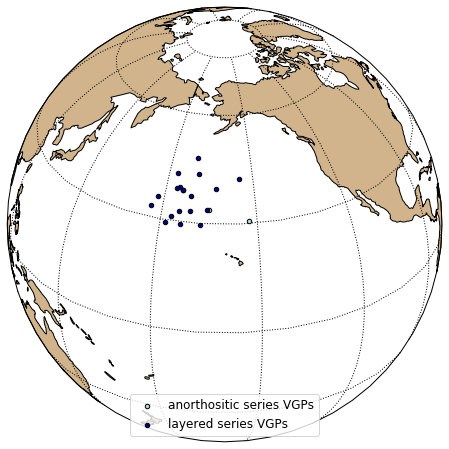

In [24]:
map_axis = ipmag.make_orthographic_map(central_longitude=200,central_latitude=30)
ipmag.plot_vgp(map_axis,vgp_lon=Beck_Anorthositic_filtered.vgp_lon,
               vgp_lat=Beck_Anorthositic_filtered.vgp_lat,color='lightblue',
               label='anorthositic series VGPs')
ipmag.plot_vgp(map_axis,vgp_lon=Beck_Layered_filtered.vgp_lon,
               vgp_lat=Beck_Layered_filtered.vgp_lat,color='darkblue',
               label='layered series VGPs')

plt.legend(loc=8, scatterpoints=1, fontsize=12)
plt.show()

## New data from the anorthositic series

Here we plot the paleomagnetic data from sites FC1 and FC4 of the anorthositic series from where the geochronology samples were collected.

There are not structural measurements from within the anorthositic series in this locality that can be used for tilt-correction. However, there are measurements higher in the intrusive pile such as in the Houghtaling Creek Troctolite. Given the large-scale regional tilt, these measurements can be used for the FC sites.

In [25]:
# import structural measurements from published map data
HCT_orientations = pd.read_csv('../data/intrusive_orientations/HCT_WLFG_geochron_orientations.csv',sep=',')
HCT_orientations = HCT_orientations[(HCT_orientations.STRUCTURE == 'IL') | (HCT_orientations.STRUCTURE == 'IM') | (HCT_orientations.STRUCTURE == 'IU')]
HCT_orientations = HCT_orientations[HCT_orientations['DIP_PLUNGE']<25]
HCT_orientations = HCT_orientations[HCT_orientations['DIPD_TREND']<220]

In [26]:
HCT_orientations['strike'] = HCT_orientations['DIPD_TREND'] - 90
HCT_orientations['pole_trend'] = HCT_orientations['DIPD_TREND'] - 180
HCT_orientations['pole_plunge'] = 90 - HCT_orientations['DIP_PLUNGE']
HCT_mean_plane_pole = ipmag.fisher_mean(HCT_orientations['pole_trend'].tolist(),HCT_orientations['pole_plunge'].tolist())
HCT_mean_strike = (HCT_mean_plane_pole['dec'] + 90)%360
HCT_mean_dip = 90 - HCT_mean_plane_pole['inc']
print(HCT_mean_strike, HCT_mean_dip)

48.970981220873455 12.601368067405502


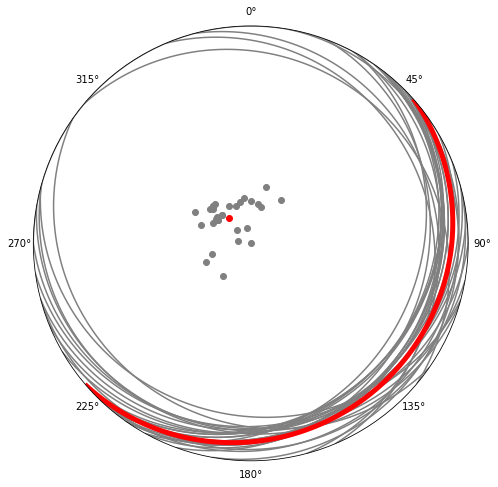

In [27]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')
ax.plane(HCT_orientations['strike'],HCT_orientations['DIP_PLUNGE'],color='grey')
ax.plane(HCT_mean_strike,HCT_mean_dip,color='red',linewidth=5)
ax.pole(HCT_orientations['strike'],HCT_orientations['DIP_PLUNGE'],color='grey')
ax.pole(HCT_mean_strike,HCT_mean_dip,color='red')

plt.show()

## New paleomagnetic data

In [28]:
# load MagIC table
North_Shore = pd.read_csv('../data/pmag_new/sites.txt', sep='\t',header=1)

# filter by tilt correction and component 
North_Shore = North_Shore[North_Shore['dir_tilt_correction'] == 0]
North_Shore = North_Shore[(North_Shore['dir_comp_name'] == 'mc') | (North_Shore['dir_comp_name'] == 'mt')]

#define the tilt correction
FC_dip_direction = HCT_mean_strike + 90
FC_dip = HCT_mean_dip

# do the tilt correction
North_Shore['dec_tc'] = [pmag.dotilt(North_Shore['dir_dec'].tolist()[i], North_Shore['dir_inc'].tolist()[i], 
                                                  FC_dip_direction, FC_dip)[0] for i in range(len(North_Shore['dir_dec']))]

North_Shore['inc_tc'] = [pmag.dotilt(North_Shore['dir_dec'].tolist()[i], North_Shore['dir_inc'].tolist()[i], 
                                                  FC_dip_direction, FC_dip)[1] for i in range(len(North_Shore['dir_dec']))]

North_Shore = ipmag.vgp_calc(North_Shore, tilt_correction='yes',
    site_lon='lon',
    site_lat='lat',
    dec_is='dir_dec',
    inc_is='dir_inc',
    dec_tc='dec_tc',
    inc_tc='inc_tc',
)

# split out by site/method
FC1_AF = North_Shore[(North_Shore['site'].str.contains('FC1')) & (North_Shore['dir_comp_name'] == 'mc')]
FC4_AF = North_Shore[(North_Shore['site'].str.contains('FC4')) & (North_Shore['dir_comp_name'] == 'mc')]
FC1_thermal = North_Shore[(North_Shore['site'].str.contains('FC1')) & (North_Shore['dir_comp_name'] == 'mt')]
HCT_AF = North_Shore[(North_Shore['site'].str.contains('HCT')) & (North_Shore['dir_comp_name'] == 'mc')]
HCT_thermal = North_Shore[(North_Shore['site'].str.contains('HCT')) & (North_Shore['dir_comp_name'] == 'mt')]


HCT_thermal

,site,location,samples,specimens,dir_alpha95,dir_comp_name,dir_dec,dir_inc,dir_k,dir_n_samples,dir_n_specimens,dir_n_specimens_lines,dir_n_specimens_planes,dir_polarity,dir_r,dir_tilt_correction,lat,lon,analysts,criteria,software_packages,citations,method_codes,result_quality,dec_tc,inc_tc,paleolatitude,vgp_lat,vgp_lon,vgp_lat_rev,vgp_lon_rev
10,HCT1,North,HCT1-1:HCT1-2:HCT1-3:HCT1-5:HCT1-6:HCT1-8,HCT1-1b:HCT1-2b:HCT1-3b:HCT1-5b:HCT1-6b:HCT1-8b,5.6,mt,285.7,45.3,144,6,6,6,0,NaN,5.9652,0,47.6008,-91.1495,Yiming Zhang,ACCEPT,pmagpy-4.2.25: demag_gui.v.3.0,This study,LP-DIR-T:DE-BFL:DA-DIR-GEO:LP-DC4:DE-FM,g,276.317559,55.283566,35.816076,29.492268,201.037076,-29.492268,21.037076


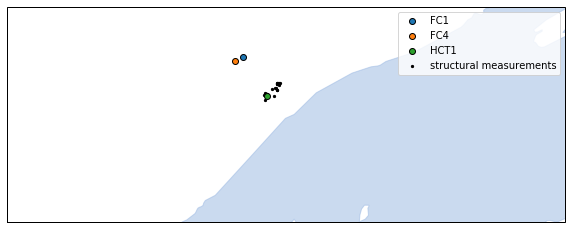

In [29]:
from pyproj import Proj

myProj = Proj("+proj=utm +zone=15N, +ellps=WGS84 +datum=WGS84 +units=m +no_defs")
lon, lat = myProj(HCT_orientations['UTME'].values, HCT_orientations['UTMN'].values, inverse=True)

central_lat = 48
central_lon = -90
extent = [central_lon-3, central_lon+1, central_lat-1, central_lat+0]

plt.figure(1,(10,10))
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_longitude=-90, central_latitude=50))
ax.set_extent(extent)

plt.scatter(FC1_AF.lon.tolist()[0], FC1_AF.lat.tolist()[0],transform=ccrs.PlateCarree(),zorder=100,color = 'C0', 
            edgecolors='black', label = FC1_AF.site.tolist()[0])
plt.scatter(FC4_AF.lon.tolist()[0], FC4_AF.lat.tolist()[0],transform=ccrs.PlateCarree(),zorder=100,color = 'C1', 
            edgecolors='black', label = FC4_AF.site.tolist()[0])
plt.scatter(HCT_thermal.lon.tolist()[0], HCT_thermal.lat.tolist()[0],transform=ccrs.PlateCarree(),color = 'C2', 
            edgecolors='black', label = HCT_thermal.site.tolist()[0],zorder=1000)
    
plt.scatter(lon.tolist(), lat.tolist(),zorder=100,transform=ccrs.PlateCarree(), color='black', label='structural measurements',s=5)

ax.coastlines(resolution='10m')
ax.add_feature(lakes_10m, alpha=0.5)
plt.legend()
plt.show()

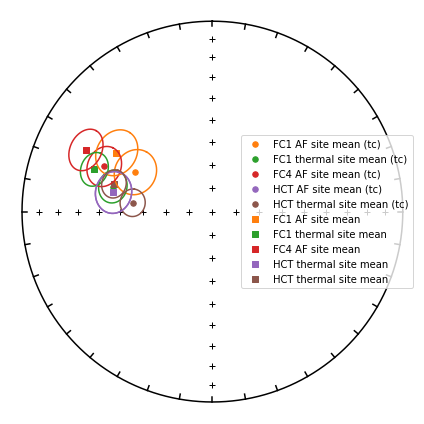

In [30]:
plt.figure(figsize=(6,6))
ipmag.plot_net()

ipmag.plot_di_mean(FC1_AF['dec_tc'].tolist()[0],
              FC1_AF['inc_tc'].tolist()[0], FC1_AF['dir_alpha95'].tolist()[0], color='C1',
              label='FC1 AF site mean (tc)',markersize=30)
ipmag.plot_di_mean(FC1_thermal['dec_tc'].tolist()[0],
              FC1_thermal['inc_tc'].tolist()[0], FC1_thermal['dir_alpha95'].tolist()[0], color='C2',
              label='FC1 thermal site mean (tc)',markersize=30)
ipmag.plot_di_mean(FC4_AF['dec_tc'].tolist()[0],
              FC4_AF['inc_tc'].tolist()[0], FC4_AF['dir_alpha95'].tolist()[0], color='C3',
              label='FC4 AF site mean (tc)',markersize=30)
ipmag.plot_di_mean(HCT_AF['dec_tc'].tolist()[0],
              HCT_AF['inc_tc'].tolist()[0], HCT_AF['dir_alpha95'].tolist()[0], color='C4',
              label='HCT AF site mean (tc)',markersize=30)
ipmag.plot_di_mean(HCT_thermal['dec_tc'].tolist()[0],
              HCT_thermal['inc_tc'].tolist()[0], HCT_thermal['dir_alpha95'].tolist()[0], color='C5',
              label='HCT thermal site mean (tc)',markersize=30)

ipmag.plot_di_mean(FC1_AF['dir_dec'].tolist()[0],
              FC1_AF['dir_inc'].tolist()[0], FC1_AF['dir_alpha95'].tolist()[0], color='C1',
              label='FC1 AF site mean',markersize=30, marker='s')
ipmag.plot_di_mean(FC1_thermal['dir_dec'].tolist()[0],
              FC1_thermal['dir_inc'].tolist()[0], FC1_thermal['dir_alpha95'].tolist()[0], color='C2',
              label='FC1 thermal site mean',markersize=30, marker='s')
ipmag.plot_di_mean(FC4_AF['dir_dec'].tolist()[0],
              FC4_AF['dir_inc'].tolist()[0], FC4_AF['dir_alpha95'].tolist()[0], color='C3',
              label='FC4 AF site mean',markersize=30, marker='s')
ipmag.plot_di_mean(HCT_AF['dec_tc'].tolist()[0],
              HCT_AF['inc_tc'].tolist()[0], HCT_AF['dir_alpha95'].tolist()[0], color='C4',
              label='HCT thermal site mean',markersize=30, marker='s')
ipmag.plot_di_mean(HCT_thermal['dir_dec'].tolist()[0],
              HCT_thermal['dir_inc'].tolist()[0], HCT_thermal['dir_alpha95'].tolist()[0], color='C5',
              label='HCT thermal site mean',markersize=30, marker='s')
plt.legend()

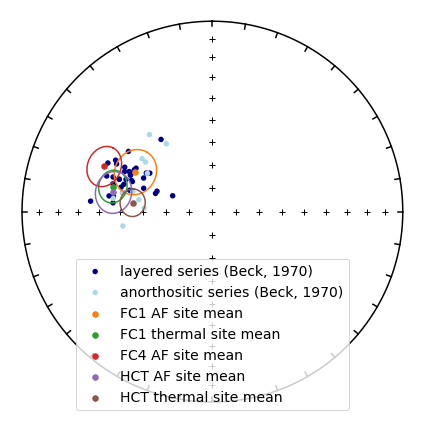

In [31]:
plt.figure(figsize=(6,6))
ipmag.plot_net()
ipmag.plot_di(Beck_Layered_series['dec_tc'].tolist(),
              Beck_Layered_series['inc_tc'].tolist(),color='darkblue',
              label='layered series (Beck, 1970)',markersize=30)
ipmag.plot_di(Beck_Anorthositic_series['dec_tc'].tolist(),
              Beck_Anorthositic_series['inc_tc'].tolist(),color='lightblue',
              label='anorthositic series (Beck, 1970)',markersize=30)

ipmag.plot_di_mean(FC1_AF['dec_tc'].tolist()[0],
              FC1_AF['inc_tc'].tolist()[0], FC1_AF['dir_alpha95'].tolist()[0], color='C1',
              label='FC1 AF site mean',markersize=30)
ipmag.plot_di_mean(FC1_thermal['dec_tc'].tolist()[0],
              FC1_thermal['inc_tc'].tolist()[0], FC1_thermal['dir_alpha95'].tolist()[0], color='C2',
              label='FC1 thermal site mean',markersize=30)
ipmag.plot_di_mean(FC4_AF['dec_tc'].tolist()[0],
              FC4_AF['inc_tc'].tolist()[0], FC4_AF['dir_alpha95'].tolist()[0], color='C3',
              label='FC4 AF site mean',markersize=30)
ipmag.plot_di_mean(HCT_AF['dec_tc'].tolist()[0],
              HCT_AF['inc_tc'].tolist()[0], HCT_AF['dir_alpha95'].tolist()[0], color='C4',
              label='HCT AF site mean',markersize=30)
ipmag.plot_di_mean(HCT_thermal['dec_tc'].tolist()[0],
              HCT_thermal['inc_tc'].tolist()[0], HCT_thermal['dir_alpha95'].tolist()[0], color='C5',
              label='HCT thermal site mean',markersize=30)

plt.legend(loc=8,fontsize=14)
plt.savefig('./code_output/site_directions.pdf')
plt.show()

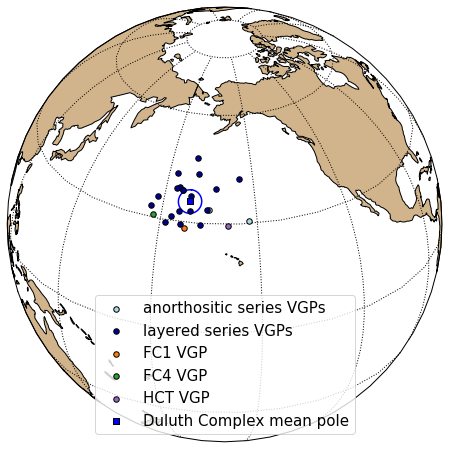

In [71]:
map_axis = ipmag.make_orthographic_map(central_longitude=200,central_latitude=30)
ipmag.plot_vgp(map_axis,vgp_lon=Beck_Anorthositic_filtered.vgp_lon,
               vgp_lat=Beck_Anorthositic_filtered.vgp_lat,color='lightblue',
               label='anorthositic series VGPs',markersize=30)
ipmag.plot_vgp(map_axis,vgp_lon=Beck_Layered_filtered.vgp_lon,
               vgp_lat=Beck_Layered_filtered.vgp_lat,color='darkblue',
               label='layered series VGPs',markersize=30)
ipmag.plot_vgp(map_axis,vgp_lon=FC1_thermal.vgp_lon.tolist()[0],
               vgp_lat=FC1_thermal.vgp_lat.tolist()[0],color='C1',
               label='FC1 VGP',markersize=30)
ipmag.plot_vgp(map_axis,vgp_lon=FC4_AF.vgp_lon.tolist()[0],
               vgp_lat=FC4_AF.vgp_lat.tolist()[0],color='C2',
               label='FC4 VGP',markersize=30)
ipmag.plot_vgp(map_axis,vgp_lon=HCT_thermal.vgp_lon.tolist()[0],
               vgp_lat=HCT_thermal.vgp_lat.tolist()[0],color='C4',
               label='HCT VGP',markersize=30)

layered_lons = Beck_Layered_filtered.vgp_lon.tolist()
layered_lats = Beck_Layered_filtered.vgp_lat.tolist()
anorthositic_lons = Beck_Anorthositic_filtered.vgp_lon.tolist()
anorthositic_lats = Beck_Anorthositic_filtered.vgp_lat.tolist()
new_vgp_lons = HCT_thermal.vgp_lon.tolist() + FC4_AF.vgp_lon.tolist() + FC1_thermal.vgp_lon.tolist()
new_vgp_lats = HCT_thermal.vgp_lat.tolist() + FC4_AF.vgp_lat.tolist() + FC1_thermal.vgp_lat.tolist()

Duluth_Complex_pole = ipmag.fisher_mean(layered_lons+anorthositic_lons+new_vgp_lons,
                                     layered_lats+anorthositic_lats+new_vgp_lats)
ipmag.plot_pole(map_axis,Duluth_Complex_pole['dec'],Duluth_Complex_pole['inc'],Duluth_Complex_pole['alpha95'], 
                color ='blue', marker='s',
                label = 'Duluth Complex mean pole',markersize=40)

plt.legend(loc=8, scatterpoints=1, fontsize=15)
plt.savefig('./code_output/Duluth_complex_VGPs.pdf')
plt.show()

In [33]:
ipmag.print_pole_mean(Duluth_Complex_pole)

Plon: 188.7  Plat: 35.6
Number of directions in mean (n): 24
Angular radius of 95% confidence (A_95): 3.1
Precision parameter (k) estimate: 91.1


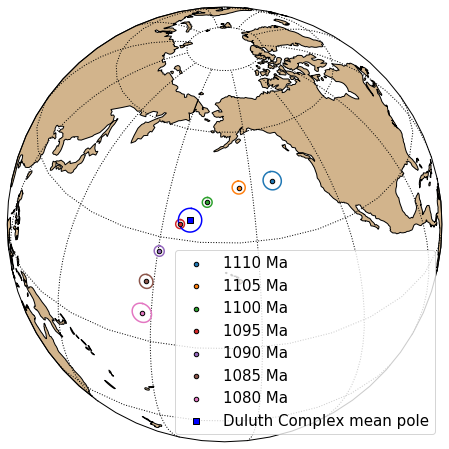

In [70]:
one_Euler_pole_lon = np.loadtxt('../data/mcplates_results/pole_lon_positions1.txt')
one_Euler_pole_lat = np.loadtxt('../data/mcplates_results/pole_lat_positions1.txt')

m = ipmag.make_orthographic_map(central_latitude=35,central_longitude=200)

fisher0 = ipmag.fisher_mean(one_Euler_pole_lon[:,0]+180,one_Euler_pole_lat[:,0])
theta0 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,0]+180,one_Euler_pole_lat[:,0])
fisher0['theta'] = theta0
ipmag.plot_pole(m,fisher0['dec'],fisher0['inc'],theta0,color='C0',label='1110 Ma')

fisher1 = ipmag.fisher_mean(one_Euler_pole_lon[:,1]+180,one_Euler_pole_lat[:,1])
theta1 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,1]+180,one_Euler_pole_lat[:,1])
fisher1['theta'] = theta1
ipmag.plot_pole(m,fisher1['dec'],fisher1['inc'],theta1,color='C1',label='1105 Ma')

fisher2 = ipmag.fisher_mean(one_Euler_pole_lon[:,2]+180,one_Euler_pole_lat[:,2])
theta2 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,2]+180,one_Euler_pole_lat[:,2])
fisher2['theta'] = theta2
ipmag.plot_pole(m,fisher2['dec'],fisher2['inc'],theta2,color='C2',label='1100 Ma')

fisher3 = ipmag.fisher_mean(one_Euler_pole_lon[:,3]+180,one_Euler_pole_lat[:,3])
theta3 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,3]+180,one_Euler_pole_lat[:,3])
fisher3['theta'] = theta3
ipmag.plot_pole(m,fisher3['dec'],fisher3['inc'],theta3,color='C3',label='1095 Ma')

fisher4 = ipmag.fisher_mean(one_Euler_pole_lon[:,4]+180,one_Euler_pole_lat[:,4])
theta4 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,4]+180,one_Euler_pole_lat[:,4])
fisher4['theta'] = theta4
ipmag.plot_pole(m,fisher4['dec'],fisher4['inc'],theta4,color='C4',label='1090 Ma')

fisher5 = ipmag.fisher_mean(one_Euler_pole_lon[:,5]+180,one_Euler_pole_lat[:,5])
theta5 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,5]+180,one_Euler_pole_lat[:,5])
fisher5['theta'] = theta5
ipmag.plot_pole(m,fisher5['dec'],fisher5['inc'],theta5,color='C5',label='1085 Ma')

fisher6 = ipmag.fisher_mean(one_Euler_pole_lon[:,6]+180,one_Euler_pole_lat[:,6])
theta6 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,6]+180,one_Euler_pole_lat[:,6])
fisher6['theta'] = theta6
ipmag.plot_pole(m,fisher6['dec'],fisher6['inc'],theta6,color='C6',label='1080 Ma')

ipmag.plot_pole(m,Duluth_Complex_pole['dec'],Duluth_Complex_pole['inc'],Duluth_Complex_pole['alpha95'], 
                color ='blue', marker='s', label = 'Duluth Complex mean pole',markersize=30)
plt.legend(loc=4, fontsize=15)
plt.savefig('./code_output/Duluth_Complex_Euler_Path.pdf')
plt.show()

In [35]:
Duluth_lat = 46.79
Duluth_lon = -92.10

print('Duluth paleolatitude at 1110 Ma (1 Euler inversion):')
print(ipmag.lat_from_pole(Duluth_lon, Duluth_lat, fisher0['dec'], fisher0['inc']))
print('')
print('Duluth paleolatitude at 1105 Ma (1 Euler inversion):')
print(ipmag.lat_from_pole(Duluth_lon, Duluth_lat, fisher1['dec'], fisher1['inc']))
print('')
print('Duluth paleolatitude at 1100 Ma (1 Euler inversion):')
print(ipmag.lat_from_pole(Duluth_lon, Duluth_lat, fisher2['dec'], fisher2['inc']))
print('')
print('Duluth paleolatitude at 1095 Ma (1 Euler inversion):')
print(ipmag.lat_from_pole(Duluth_lon, Duluth_lat, fisher3['dec'], fisher3['inc']))
print('')
print('Duluth paleolatitude implied by Duluth Complex pole:')
print(ipmag.lat_from_pole(Duluth_lon, Duluth_lat, Duluth_Complex_pole['dec'],Duluth_Complex_pole['inc']))

Duluth paleolatitude at 1110 Ma (1 Euler inversion):
56.087281584905

Duluth paleolatitude at 1105 Ma (1 Euler inversion):
47.36765244697051

Duluth paleolatitude at 1100 Ma (1 Euler inversion):
38.19752912645617

Duluth paleolatitude at 1095 Ma (1 Euler inversion):
29.094926428672316

Duluth paleolatitude implied by Duluth Complex pole:
31.903681735535827


In [36]:
North_Shore

,site,location,samples,specimens,dir_alpha95,dir_comp_name,dir_dec,dir_inc,dir_k,dir_n_samples,dir_n_specimens,dir_n_specimens_lines,dir_n_specimens_planes,dir_polarity,dir_r,dir_tilt_correction,lat,lon,analysts,criteria,software_packages,citations,method_codes,result_quality,dec_tc,inc_tc,paleolatitude,vgp_lat,vgp_lon,vgp_lat_rev,vgp_lon_rev
2,FC1,North,FC1-1:FC1-2:FC1-3:FC1-4:FC1-5:FC1-6:FC1-7:FC1-...,FC1-1a:FC1-2a:FC1-3a:FC1-4a:FC1-5a:FC1-6a:FC1-...,9.3,mc,301.6,40.5,32,9,9,9,0,NaN,8.7489,0,47.7826,-91.3265,Yiming Zhang,ACCEPT,pmagpy-4.2.25: demag_gui.v.3.0,This study,LP-DIR-AF:DE-BFL:DA-DIR-GEO:LP-DC4:DE-FM,g,297.134482,52.385273,32.980271,41.316929,184.974390,-41.316929,4.974390
3,FC1,North,FC1-1:FC1-2:FC1-3:FC1-4:FC1-5:FC1-6:FC1-7:FC1-...,FC1-1b:FC1-2b:FC1-3b:FC1-4b:FC1-5b:FC1-6b:FC1-...,6.5,mt,289.7,34.4,64,9,9,9,0,NaN,8.8741,0,47.7826,-91.3265,Yiming Zhang,ACCEPT,pmagpy-4.2.25: demag_gui.v.3.0,This study,LP-DIR-T:DE-BFL:DA-DIR-GEO:LP-DC4:DE-FM,g,284.110929,45.103706,26.648106,28.593061,187.847898,-28.593061,7.847898
6,FC4,North,FC4-1:FC4-2:FC4-3:FC4-6:FC4-7:FC4-8:FC4-9,FC4-1a:FC4-2a:FC4-3a:FC4-6a:FC4-7a:FC4-8a:FC4-9a,7.9,mc,296.0,26.8,59,7,7,7,0,NaN,6.8977,0,47.7625,-91.3827,NaN,ACCEPT,pmagpy-4.2.25: demag_gui.v.3.0,This study,LP-DIR-AF:DE-BFL:DA-DIR-GEO:LP-DC4:DE-FM,g,292.632873,38.265560,21.523703,30.815285,177.388326,-30.815285,357.388326
9,HCT1,North,HCT1-1:HCT1-2:HCT1-3:HCT1-5:HCT1-6:HCT1-7:HCT1-8,HCT1-1a:HCT1-2a:HCT1-3a:HCT1-5a:HCT1-6a:HCT1-7...,8.3,mc,287.2,35.6,54,7,7,7,0,NaN,6.8893,0,47.6008,-91.1495,Yiming Zhang,ACCEPT,pmagpy-4.2.25: demag_gui.v.3.0,This study,LP-DIR-AF:DE-BFL:DA-DIR-GEO:LP-DC4:DE-FM,g,280.953111,45.964685,27.344701,26.937064,190.833620,-26.937064,10.833620
10,HCT1,North,HCT1-1:HCT1-2:HCT1-3:HCT1-5:HCT1-6:HCT1-8,HCT1-1b:HCT1-2b:HCT1-3b:HCT1-5b:HCT1-6b:HCT1-8b,5.6,mt,285.7,45.3,144,6,6,6,0,NaN,5.9652,0,47.6008,-91.1495,Yiming Zhang,ACCEPT,pmagpy-4.2.25: demag_gui.v.3.0,This study,LP-DIR-T:DE-BFL:DA-DIR-GEO:LP-DC4:DE-FM,g,276.317559,55.283566,35.816076,29.492268,201.037076,-29.492268,21.037076


In [37]:
North_Shore.to_latex(columns=['site', 'lat', 'lon','dir_n_samples','dir_dec','dir_inc','dec_tc','inc_tc','dir_k','dir_alpha95','vgp_lat','vgp_lon'])

'\\begin{tabular}{llrrrrrrrrrrr}\n\\toprule\n{} &  site &      lat &      lon &  dir\\_n\\_samples &  dir\\_dec &  dir\\_inc &      dec\\_tc &     inc\\_tc &  dir\\_k &  dir\\_alpha95 &    vgp\\_lat &     vgp\\_lon \\\\\n\\midrule\n2  &   FC1 &  47.7826 & -91.3265 &              9 &    301.6 &     40.5 &  297.134482 &  52.385273 &     32 &          9.3 &  41.316929 &  184.974390 \\\\\n3  &   FC1 &  47.7826 & -91.3265 &              9 &    289.7 &     34.4 &  284.110929 &  45.103706 &     64 &          6.5 &  28.593061 &  187.847898 \\\\\n6  &   FC4 &  47.7625 & -91.3827 &              7 &    296.0 &     26.8 &  292.632873 &  38.265560 &     59 &          7.9 &  30.815285 &  177.388326 \\\\\n9  &  HCT1 &  47.6008 & -91.1495 &              7 &    287.2 &     35.6 &  280.953111 &  45.964685 &     54 &          8.3 &  26.937064 &  190.833620 \\\\\n10 &  HCT1 &  47.6008 & -91.1495 &              6 &    285.7 &     45.3 &  276.317559 &  55.283566 &    144 &          5.6 &  29.492268 &  201.0

In [38]:
North_Shore.to_excel('./code_output/North_Shore_Data.xls',columns=['site', 'lat', 'lon','dir_n_samples','dir_dec','dir_inc','dec_tc','inc_tc','dir_k','dir_alpha95','vgp_lat','vgp_lon'])

In [39]:
Beck_Anorthositic_series_tilt_corrected.to_excel('./code_output/Beck_anorthosite.xls',columns=['site', 'lat', 'lon','dir_n_samples','dir_dec','dir_inc','dec_tc','inc_tc','dir_k','dir_alpha95','vgp_lat','vgp_lon'])
Beck_Layered_series_tilt_corrected.to_excel('./code_output/Beck_layered.xls',columns=['site', 'lat', 'lon','dir_n_samples','dir_dec','dir_inc','dec_tc','inc_tc','dir_k','dir_alpha95','vgp_lat','vgp_lon'])

# Duluth Complex geochronology

New U-Pb dates developed from Duluth Complex and Beaver Bay Complex intrusive rocks can be compared to U-Pb dates developed from Midcontinent Rift volcanics and published in:

Swanson-Hysell, N.L., Ramenzani, J., Fairchild, L.M. and Rose, I., 2019, **Failed rifting and fast drifting: Midcontinent Rift development, Laurentia's rapid motion and the driver of Grenvillian orogenesis**, *Geological Society of America Bulletin*, doi:10.1130/B31944.1.

## Define function to generate date bar plot

In [40]:
def plot_dates(zircon_means, zircon_2sigmas, include, 
               sample_means, sample_2sigmas, colors, labels,
               legend=True, figsize=None, ylim=None, lineweight=None, 
               bbox_to_anchor=None, plot_zircons=True):
    """
    Make a date distribution plot.
    
    inputs:
    - zircon_means = list of numpy arrays containing mean dates (each array being a sample)
    - zircon_2sigmas = list of numpy arrays containing 2sigmas (each array being a sample)
    - include = list of 'yes' or 'no' array for inclusion in mean (each array being a sample)
    - sample_means = list of sample mean dates (one per sample)
    - sample_2sigmas = list of sample 2sigmas (one per sample)
    - colors = list of colors (one per sample)
    - labels = list of labels (one per sample)
    - figsize = figure size (optional)
    - ylim = ylim (optional)
    - linewidth = zircon linewidth (optional)
    - bbox_to_anchor = for the legend (optional)
    """
    # formatting constants
    zircon_spacing = 0.9
    sample_spacing = 5.75 - zircon_spacing
    start_x = 3
    yes_alpha = 0.8
    no_alpha = 0.2
    x_positions = []
    if lineweight==None:
        lineweight=3
    
    # initialize current x
    current_x = start_x
    
    # number of samples
    n_samples = len(zircon_means)
    
    # plot
    if figsize == None:
        fig, ax = plt.subplots()
    else:
        fig, ax = plt.subplots(figsize=figsize)
    
    if plot_zircons == False:
        for i in range(n_samples):
            sample_width = 20

            rectangle = matplotlib.patches.Rectangle((current_x-1, sample_means[i]-sample_2sigmas[i]),\
                                                     sample_width+1, sample_2sigmas[i]*2, color='lightgrey')
            ax.add_patch(rectangle)

            # the mean age

            ax.hlines(sample_means[i], current_x-1, current_x+sample_width)
            
            current_x = current_x + 25
        
    if plot_zircons == True:
        # iterate over each sample
        for i in range(n_samples):

            # number of zircons in sample
            n_zircons = len(zircon_means[i])

            # sample width
            sample_width = zircon_spacing*n_zircons

            rectangle = matplotlib.patches.Rectangle((current_x-1, sample_means[i]-sample_2sigmas[i]),\
                                                     sample_width+1, sample_2sigmas[i]*2, color='lightgrey')
            ax.add_patch(rectangle)

            # the mean age

            ax.hlines(sample_means[i], current_x-1, current_x+sample_width)

            # legend control
            marked = False

            # iterate over each zircon
            for j in range(n_zircons):

                if marked:
                    if include[i][j] == 'yes':
                        ax.vlines(current_x, zircon_means[i][j]-zircon_2sigmas[i][j], zircon_means[i][j]+zircon_2sigmas[i][j],\
                                  colors=colors[i], lw=lineweight, alpha=yes_alpha)
                    else:
                        ax.vlines(current_x, zircon_means[i][j]-zircon_2sigmas[i][j], zircon_means[i][j]+zircon_2sigmas[i][j],\
                                  colors=colors[i], lw=lineweight, alpha=no_alpha)
                else:
                    if include[i][j] == 'yes':
                        ax.vlines(current_x, zircon_means[i][j]-zircon_2sigmas[i][j], zircon_means[i][j]+zircon_2sigmas[i][j],\
                                  colors=colors[i], lw=lineweight, alpha=yes_alpha, label=labels[i])
                        marked = True
                    else:
                        ax.vlines(current_x, zircon_means[i][j]-zircon_2sigmas[i][j], zircon_means[i][j]+zircon_2sigmas[i][j],\
                                  colors=colors[i], lw=lineweight, alpha=no_alpha)

                # tick the x to the next zircon
                current_x = current_x + zircon_spacing

            # tick the x to the next sample
            current_x = current_x + sample_spacing
            x_positions.append(current_x-sample_spacing)
    
    # prettify
    ax.invert_yaxis()
    ax.set_ylabel('$^{206}$Pb/$^{238}$U date (Ma)',fontsize=13)
    if legend == True:
        if bbox_to_anchor == None:
            ax.legend(bbox_to_anchor=(1.8,1), fontsize=12)
        else:
            ax.legend(bbox_to_anchor=bbox_to_anchor, fontsize=12)
    if ylim != None:
        ax.set_ylim(ylim)
        
    return fig, ax, x_positions

## Import individual zircon dates for the date bar plot

In [41]:
PRI = pd.read_excel('../data/geochron_new/CAIDTIMS_DataTable_032420.xls',
                      header=6,nrows=6,names=['zircon','Th_U','206Pb_mol','206Pb_mol%','Pb*/Pbc',
                                              'Pbc','206Pb/204Pb','','','','','','','','','','',
                                              '207Pb/206Pb_date','207Pb/206Pb_date_2sigma',
                                              '207Pb/235U_date','207Pb/235U_date_2sigma',
                                              '206Pb/238U_date','206Pb/238U_date_2sigma'])
PRI['include'] = pd.Series(data=['yes','yes','yes','yes','yes','yes'])
PRI

,zircon,Th_U,206Pb_mol,206Pb_mol%,Pb*/Pbc,Pbc,206Pb/204Pb,,.1,.2,.3,.4,.5,.6,.7,.8,.9,207Pb/206Pb_date,207Pb/206Pb_date_2sigma,207Pb/235U_date,207Pb/235U_date_2sigma,206Pb/238U_date,206Pb/238U_date_2sigma,include
0,z2,0.665204,20.738831,0.999465,598.997048,0.912757,34763.091318,NaN,0.201468,0.076115,0.042027,1.945654,0.084024,0.185393,0.045037,0.967479,NaN,1098.100543,0.840968,1096.949502,0.563532,1096.369296,0.454065,yes
1,z5,0.795390,15.370751,0.999298,470.376992,0.888256,26480.058244,NaN,0.240897,0.076087,0.041746,1.944886,0.083922,0.185388,0.044575,0.974036,NaN,1097.367406,0.835439,1096.684811,0.562770,1096.341199,0.449398,yes
2,z1,0.714043,21.496997,0.999219,414.920581,1.381772,23808.791473,NaN,0.216261,0.076084,0.043480,1.944671,0.085307,0.185375,0.045624,0.959467,NaN,1097.285151,0.870142,1096.610856,0.572040,1096.271661,0.459944,yes
3,z6,0.624498,12.483620,0.999191,391.978441,0.831426,22978.687310,NaN,0.189143,0.076096,0.038926,1.944592,0.083271,0.185339,0.045191,0.991360,NaN,1097.592711,0.778968,1096.583583,0.558374,1096.075160,0.455501,yes
4,z4,0.609620,11.022847,0.998837,271.821434,1.054866,15997.732443,NaN,0.184637,0.076106,0.045346,1.944827,0.087321,0.185336,0.046494,0.952037,NaN,1097.868085,0.907422,1096.664479,0.585555,1096.058666,0.468634,yes
5,z3,0.668869,4.580803,0.998332,192.103651,0.629200,11151.532746,NaN,0.202582,0.076132,0.055232,1.945424,0.094024,0.185329,0.047827,0.898106,NaN,1098.551154,1.105137,1096.870480,0.630570,1096.024042,0.482057,yes


In [42]:
FC_4b = pd.read_excel('../data/geochron_new/CAIDTIMS_DataTable_032420.xls',
                      header=15,nrows=10,names=['zircon','Th_U','206Pb_mol','206Pb_mol%','Pb*/Pbc',
                                              'Pbc','206Pb/204Pb','','','','','','','','','','',
                                              '207Pb/206Pb_date','207Pb/206Pb_date_2sigma',
                                              '207Pb/235U_date','207Pb/235U_date_2sigma',
                                              '206Pb/238U_date','206Pb/238U_date_2sigma'])
FC_4b['include'] = pd.Series(data=['no','yes','yes','yes','yes','yes','yes','yes','yes','no'])
FC_4b

,zircon,Th_U,206Pb_mol,206Pb_mol%,Pb*/Pbc,Pbc,206Pb/204Pb,,.1,.2,.3,.4,.5,.6,.7,.8,.9,207Pb/206Pb_date,207Pb/206Pb_date_2sigma,207Pb/235U_date,207Pb/235U_date_2sigma,206Pb/238U_date,206Pb/238U_date_2sigma,include
0,z8,0.774763,25.204889,0.999632,893.961443,0.762709,50552.483390,NaN,0.234646,0.076045,0.040970,1.944405,0.084213,0.185445,0.046651,0.965970,NaN,1096.251607,0.820043,1096.518915,0.564675,1096.652720,0.470449,no
1,z9,0.708034,1.914718,0.995052,65.136010,0.782770,3759.079480,NaN,0.214445,0.075914,0.093205,1.939760,0.139723,0.185322,0.072586,0.793932,NaN,1092.793345,1.866530,1094.916043,0.936129,1095.983807,0.731576,yes
2,z10,0.732493,8.741441,0.998602,232.714287,1.006159,13303.954512,NaN,0.221854,0.076063,0.047200,1.943304,0.088769,0.185297,0.046514,0.946454,NaN,1096.720099,0.944684,1096.139375,0.595111,1095.846192,0.468752,yes
3,z2,0.685956,30.215754,0.999553,720.872893,1.110498,41626.178163,NaN,0.207760,0.076108,0.041134,1.944432,0.084174,0.185295,0.046232,0.967581,NaN,1097.903848,0.823122,1096.528319,0.564413,1095.835821,0.465909,yes
4,z4,0.705346,20.983914,0.999470,610.239491,0.915220,35079.063942,NaN,0.213633,0.076103,0.041576,1.944131,0.085021,0.185277,0.047189,0.962973,NaN,1097.785830,0.831979,1096.424420,0.570068,1095.738377,0.475511,yes
5,z11,0.716248,11.751073,0.998873,287.658581,1.090072,16503.217227,NaN,0.216936,0.076093,0.045205,1.943756,0.087111,0.185266,0.046228,0.953820,NaN,1097.514033,0.904642,1096.295173,0.584039,1095.680882,0.465806,yes
6,z3,0.637369,48.508804,0.999751,1280.248927,0.992261,74775.472679,NaN,0.193046,0.076115,0.040481,1.944305,0.086180,0.185265,0.050644,0.956941,NaN,1098.089814,0.810031,1096.484558,0.577856,1095.675321,0.510301,yes
7,z1,0.630074,18.180244,0.999420,547.799730,0.867566,32063.117209,NaN,0.190837,0.076078,0.041777,1.943210,0.084107,0.185251,0.045221,0.969363,NaN,1097.117066,0.836080,1096.106997,0.563848,1095.599212,0.455627,yes
8,z6,0.658618,12.040454,0.999194,396.896589,0.798492,23076.985734,NaN,0.199484,0.076086,0.043555,1.943138,0.086468,0.185223,0.047401,0.954788,NaN,1097.342372,0.871633,1096.081885,0.579669,1095.447828,0.477528,yes
9,z5,0.466824,9.685236,0.998807,255.684352,0.951335,15586.620064,NaN,0.141401,0.076159,0.045771,1.943271,0.087635,0.185060,0.046373,0.951710,NaN,1099.241376,0.915732,1096.128026,0.587506,1094.561151,0.466827,no


In [43]:
FC_1 = pd.read_excel('../data/geochron_new/CAIDTIMS_DataTable_032420.xls',
                      header=28,nrows=10,names=['zircon','Th_U','206Pb_mol','206Pb_mol%','Pb*/Pbc',
                                              'Pbc','206Pb/204Pb','','','','','','','','','','',
                                              '207Pb/206Pb_date','207Pb/206Pb_date_2sigma',
                                              '207Pb/235U_date','207Pb/235U_date_2sigma',
                                              '206Pb/238U_date','206Pb/238U_date_2sigma'])
FC_1['include'] = pd.Series(data=['yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes'])
FC_1

,zircon,Th_U,206Pb_mol,206Pb_mol%,Pb*/Pbc,Pbc,206Pb/204Pb,,.1,.2,.3,.4,.5,.6,.7,.8,.9,207Pb/206Pb_date,207Pb/206Pb_date_2sigma,207Pb/235U_date,207Pb/235U_date_2sigma,206Pb/238U_date,206Pb/238U_date_2sigma,include
0,z21,0.346609,89.347895,0.999927,4054.676586,0.536709,254585.737618,NaN,0.104978,0.076114,0.040011,1.945436,0.085824,0.185375,0.050673,0.957982,NaN,1098.075509,0.800634,1096.874461,0.575582,1096.269262,0.510845,yes
1,z23,1.361833,38.675195,0.999810,1968.511425,0.604166,97907.295233,NaN,0.412450,0.076128,0.040295,1.945645,0.085729,0.185360,0.050131,0.958654,NaN,1098.447442,0.806270,1096.946443,0.574965,1096.190626,0.505346,yes
2,z22,0.614343,135.133318,0.999962,8331.540030,0.422393,489236.023246,NaN,0.186069,0.076095,0.039946,1.944341,0.085691,0.185317,0.050545,0.958392,NaN,1097.564101,0.799394,1096.496987,0.574579,1095.959045,0.509420,yes
3,z26,1.443480,63.568766,0.999918,4619.958647,0.430198,225978.970327,NaN,0.437182,0.076115,0.040037,1.944854,0.084192,0.185317,0.047834,0.965270,NaN,1098.093390,0.801159,1096.673976,0.564577,1095.958878,0.482097,yes
4,z20,1.508076,98.565374,0.999919,4740.478757,0.658544,228892.387686,NaN,0.456746,0.076133,0.040032,1.945290,0.093168,0.185315,0.062308,0.944068,NaN,1098.561883,0.800995,1096.824143,0.624818,1095.947910,0.627970,yes
5,z25,0.684380,41.109875,0.999849,2138.855734,0.509040,123513.915634,NaN,0.207283,0.076130,0.040198,1.944934,0.083452,0.185289,0.046252,0.969964,NaN,1098.479629,0.804322,1096.701475,0.559626,1095.806250,0.466096,yes
6,z19,0.715076,125.901073,0.999941,5523.148853,0.608119,316608.663227,NaN,0.216582,0.076125,0.039978,1.944464,0.085099,0.185255,0.049487,0.960828,NaN,1098.368764,0.799938,1096.539480,0.570621,1095.618115,0.498619,yes
7,z27,0.546654,56.258525,0.999807,1613.937040,0.892957,96360.365426,NaN,0.165571,0.076142,0.040389,1.944896,0.083699,0.185254,0.046503,0.968172,NaN,1098.819375,0.808107,1096.688323,0.561273,1095.615267,0.468548,yes
8,z18,1.413612,46.240978,0.999797,1865.096833,0.770490,91791.963200,NaN,0.428148,0.076104,0.040343,1.943656,0.084305,0.185230,0.047599,0.965248,NaN,1097.800136,0.807306,1096.260529,0.565219,1095.485328,0.479545,yes
9,z24,1.439475,92.317512,0.999944,6768.172748,0.426115,331312.986492,NaN,0.435984,0.076107,0.039986,1.943493,0.084925,0.185206,0.049194,0.961596,NaN,1097.900271,0.800155,1096.204372,0.569359,1095.351315,0.495552,yes


In [44]:
BEI = pd.read_excel('../data/geochron_new/CAIDTIMS_DataTable_032420.xls',
                      header=41,nrows=6,names=['zircon','Th_U','206Pb_mol','206Pb_mol%','Pb*/Pbc',
                                              'Pbc','206Pb/204Pb','','','','','','','','','','',
                                              '207Pb/206Pb_date','207Pb/206Pb_date_2sigma',
                                              '207Pb/235U_date','207Pb/235U_date_2sigma',
                                              '206Pb/238U_date','206Pb/238U_date_2sigma'])
BEI['include'] = pd.Series(data=['yes','yes','yes','yes','yes','yes'])
BEI

,zircon,Th_U,206Pb_mol,206Pb_mol%,Pb*/Pbc,Pbc,206Pb/204Pb,,.1,.2,.3,.4,.5,.6,.7,.8,.9,207Pb/206Pb_date,207Pb/206Pb_date_2sigma,207Pb/235U_date,207Pb/235U_date_2sigma,206Pb/238U_date,206Pb/238U_date_2sigma,include
0,z4,0.680513,16.166279,0.999059,341.789128,1.251490,19771.884380,NaN,0.206107,0.076097,0.043677,1.944811,0.085082,0.185357,0.044485,0.965728,NaN,1097.621322,0.874051,1096.659031,0.570539,1096.174776,0.448424,yes
1,z6a,0.648842,30.114618,0.999651,914.282088,0.864928,53260.553285,NaN,0.196517,0.076078,0.045237,1.944074,0.085445,0.185332,0.045499,0.942047,NaN,1097.131371,0.905329,1096.404753,0.572900,1096.038809,0.458593,yes
2,z6b,0.841343,24.905968,0.999584,803.433314,0.851613,44740.242394,NaN,0.254820,0.076081,0.039295,1.944010,0.084195,0.185319,0.047651,0.974037,NaN,1097.210050,0.786410,1096.382906,0.564514,1095.966354,0.480253,yes
3,z5,0.651769,4.752472,0.998288,186.418528,0.669905,10866.936150,NaN,0.197405,0.076062,0.049568,1.943397,0.090414,0.185308,0.046029,0.941509,NaN,1096.695065,0.992072,1096.171437,0.606148,1095.907372,0.463888,yes
4,z3,0.575568,6.727079,0.998244,178.375718,0.972931,10591.668848,NaN,0.174326,0.076104,0.051975,1.944330,0.091373,0.185294,0.045535,0.927870,NaN,1097.810864,1.040079,1096.493129,0.612679,1095.829451,0.458877,yes
5,z1,0.522555,5.978246,0.998057,159.135870,0.956634,9574.788902,NaN,0.158275,0.076119,0.053582,1.943668,0.094764,0.185195,0.049545,0.911999,NaN,1098.193526,1.072177,1096.264721,0.635342,1095.292982,0.499063,yes


In [45]:
HCT = pd.read_excel('../data/geochron_new/CAIDTIMS_DataTable_032420.xls',
                      header=49,nrows=11,names=['zircon','Th_U','206Pb_mol','206Pb_mol%','Pb*/Pbc',
                                              'Pbc','206Pb/204Pb','','','','','','','','','','',
                                              '207Pb/206Pb_date','207Pb/206Pb_date_2sigma',
                                              '207Pb/235U_date','207Pb/235U_date_2sigma',
                                              '206Pb/238U_date','206Pb/238U_date_2sigma'])
HCT['include'] = pd.Series(data=['yes','yes','yes','yes','no','no','no','no','no','no','no'])
HCT

,zircon,Th_U,206Pb_mol,206Pb_mol%,Pb*/Pbc,Pbc,206Pb/204Pb,,.1,.2,.3,.4,.5,.6,.7,.8,.9,207Pb/206Pb_date,207Pb/206Pb_date_2sigma,207Pb/235U_date,207Pb/235U_date_2sigma,206Pb/238U_date,206Pb/238U_date_2sigma,include
0,z7,0.764721,11.693407,0.997795,148.590148,2.124054,8437.048906,NaN,0.231617,0.076148,0.054816,1.945126,0.094359,0.185263,0.046349,0.920022,NaN,1098.958850,1.096735,1096.767700,0.632785,1095.664310,0.467016,yes
1,z6,0.665971,4.761950,0.996835,101.024775,1.242870,5877.497309,NaN,0.201709,0.076088,0.066774,1.943504,0.106356,0.185254,0.051201,0.869933,NaN,1097.388864,1.336291,1096.208325,0.713036,1095.613548,0.515880,yes
2,z1,0.395540,3.702192,0.994501,54.247538,1.683118,3382.175294,NaN,0.119804,0.076008,0.099011,1.940861,0.138646,0.185196,0.059801,0.783685,NaN,1095.293164,1.982058,1095.296299,0.929091,1095.297235,0.602377,yes
3,z10,0.719092,3.506297,0.996543,93.626752,1.000012,5380.271803,NaN,0.217804,0.076115,0.069366,1.943201,0.108273,0.185159,0.050520,0.865074,NaN,1098.100543,1.388030,1096.103683,0.725851,1095.098899,0.508801,yes
4,z4,1.566024,1.317539,0.987617,31.077112,1.358191,1502.003580,NaN,0.474332,0.076022,0.209560,1.939747,0.255769,0.185058,0.082579,0.670508,NaN,1095.640063,4.194906,1094.911430,1.713616,1094.545660,0.831297,no
5,z9,1.053099,4.869438,0.997980,173.136262,0.810178,9209.435293,NaN,0.318984,0.076086,0.053514,1.940680,0.093928,0.184991,0.047531,0.920446,NaN,1097.328067,1.070960,1095.233677,0.629408,1094.181048,0.478328,no
6,z12,1.398374,4.797283,0.997744,166.661643,0.891787,8244.640101,NaN,0.423571,0.076078,0.056917,1.939859,0.097822,0.184932,0.050157,0.901529,NaN,1097.117066,1.139100,1094.950120,0.655408,1093.860042,0.504628,no
7,z11,0.687422,2.186194,0.994740,60.962741,0.950404,3536.123144,NaN,0.208227,0.076054,0.096413,1.939117,0.134773,0.184918,0.056470,0.792135,NaN,1096.498370,1.929697,1094.693930,0.902862,1093.786140,0.568103,no
8,z14,0.403788,1.060983,0.995127,61.392763,0.427131,3817.030070,NaN,0.122313,0.076053,0.085643,1.938838,0.233250,0.184895,0.202313,0.932421,NaN,1096.462607,1.714137,1094.597559,1.562490,1093.659915,2.035108,no
9,z8,2.079234,1.584600,0.992583,57.415270,0.973467,2507.772918,NaN,0.629813,0.076134,0.128243,1.940092,0.246596,0.184818,0.191170,0.858150,NaN,1098.583341,2.566016,1095.030500,1.652254,1093.244146,1.922347,no


In [46]:
WLFG = pd.read_excel('../data/geochron_new/CAIDTIMS_DataTable_032420.xls',
                      header=62,nrows=8,names=['zircon','Th_U','206Pb_mol','206Pb_mol%','Pb*/Pbc',
                                              'Pbc','206Pb/204Pb','','','','','','','','','','',
                                              '207Pb/206Pb_date','207Pb/206Pb_date_2sigma',
                                              '207Pb/235U_date','207Pb/235U_date_2sigma',
                                              '206Pb/238U_date','206Pb/238U_date_2sigma'])
WLFG['include'] = pd.Series(data=['yes','yes','yes','yes','yes','no','no','no'])
WLFG

,zircon,Th_U,206Pb_mol,206Pb_mol%,Pb*/Pbc,Pbc,206Pb/204Pb,,.1,.2,.3,.4,.5,.6,.7,.8,.9,207Pb/206Pb_date,207Pb/206Pb_date_2sigma,207Pb/235U_date,207Pb/235U_date_2sigma,206Pb/238U_date,206Pb/238U_date_2sigma,include
0,z2,1.224601,3.644101,0.996738,111.063300,0.980568,5701.490862,NaN,0.370977,0.075967,0.066129,1.933162,0.105049,0.184562,0.049038,0.880164,NaN,1094.195247,1.324029,1092.634480,0.703000,1091.851709,0.492535,yes
1,z9,1.236322,1.201512,0.980587,18.408557,1.955569,958.131961,NaN,0.374529,0.076083,0.312266,1.936035,0.382628,0.184555,0.134461,0.650878,NaN,1097.249389,6.249326,1093.628513,2.561876,1091.809997,1.350467,yes
2,z16,1.208902,0.771680,0.987189,27.918931,0.823318,1451.864318,NaN,0.366226,0.075998,0.204605,1.933520,0.265114,0.184521,0.114071,0.685053,NaN,1095.021367,4.096086,1092.758355,1.774281,1091.623287,1.145497,yes
3,z26,1.115325,1.319440,0.992252,45.477806,0.847075,2400.504923,NaN,0.337884,0.075943,0.130765,1.931614,0.171326,0.184473,0.064427,0.743102,NaN,1093.562245,2.618404,1092.098518,1.146214,1091.364092,0.646834,yes
4,z19,2.350041,0.398676,0.971479,15.320475,0.962260,652.153967,NaN,0.711935,0.076052,0.418774,1.933129,0.516889,0.184353,0.154665,0.723818,NaN,1096.437573,8.381948,1092.622947,3.459052,1090.710440,1.551951,yes
5,z27,2.409834,0.711368,0.981585,24.219815,1.097206,1010.030685,NaN,0.730155,0.076019,0.289893,1.927110,0.351124,0.183859,0.109579,0.666186,NaN,1095.564961,5.803091,1090.537132,2.347244,1088.021503,1.097062,no
6,z28,1.612990,0.467551,0.981962,21.409403,0.706115,1031.134181,NaN,0.488775,0.075879,0.298321,1.920473,0.392827,0.183562,0.193654,0.675796,NaN,1091.892123,5.975028,1088.232224,2.622925,1086.404666,1.936135,no
7,z18,1.209867,0.241141,0.958630,8.396053,0.855564,449.597663,NaN,0.366629,0.075685,0.693197,1.915054,0.825942,0.183513,0.265967,0.619990,NaN,1086.763740,13.894494,1086.346592,5.509521,1086.138700,2.658519,no


In [47]:
AP71 = pd.read_csv('../data/geochron_published/AP71_dates.csv')
AP71.sort_values('206Pb/238U', inplace=True, ascending=False)
AP71.reset_index(inplace=True)

NSVG_RRR = pd.read_csv('../data/geochron_published/NSVG-RRR_dates.csv')
NSVG_RRR.sort_values('206Pb/238U', inplace=True, ascending=False)
NSVG_RRR.reset_index(inplace=True)

MP111_182 = pd.read_csv('../data/geochron_published/MP111-182_dates.csv')
MP111_182.sort_values('206Pb/238U', inplace=True, ascending=False)
MP111_182.reset_index(inplace=True)

CF1 = pd.read_csv('../data/geochron_published/CF1_dates.csv')
CF1.sort_values('206Pb/238U', inplace=True, ascending=False)
CF1.reset_index(inplace=True)

NSVG_40I = pd.read_csv('../data/geochron_published/NSVG-40I_dates.csv')
NSVG_40I.sort_values('206Pb/238U', inplace=True, ascending=False)
NSVG_40I.reset_index(inplace=True)

NSVG_TH1 = pd.read_csv('../data/geochron_published/NSVG-TH1_dates.csv')
NSVG_TH1.sort_values('206Pb/238U', inplace=True, ascending=False)
NSVG_TH1.reset_index(inplace=True)

NSVG_PR = pd.read_csv('../data/geochron_published/NSVG-PR_dates.csv')
NSVG_PR.sort_values('206Pb/238U', inplace=True, ascending=False)
NSVG_PR.reset_index(inplace=True)

NSVG_GMR1 = pd.read_csv('../data/geochron_published/NSVG-GMR1_dates.csv')
NSVG_GMR1.sort_values('206Pb/238U', inplace=True, ascending=False)
NSVG_GMR1.reset_index(inplace=True)

PLV_CC1 = pd.read_csv('../data/geochron_published/PLV-CC1_dates.csv')
PLV_CC1.sort_values('206Pb/238U', inplace=True, ascending=False)
PLV_CC1.reset_index(inplace=True)

PLV_GS1 = pd.read_csv('../data/geochron_published/PLV-GS1_dates.csv')
PLV_GS1.sort_values('206Pb/238U', inplace=True, ascending=False)
PLV_GS1.reset_index(inplace=True)

LST_KP1 = pd.read_csv('../data/geochron_published/LST-KP1_dates.csv')
LST_KP1.sort_values('206Pb/238U', inplace=True, ascending=False)
LST_KP1.reset_index(inplace=True)

MI_WSB1 = pd.read_csv('../data/geochron_published/MI-WSB1_dates.csv')
MI_WSB1.sort_values('206Pb/238U', inplace=True, ascending=False)
MI_WSB1.reset_index(inplace=True)

MI_DI1 = pd.read_csv('../data/geochron_published/MI-DI1_dates.csv')
MI_DI1.sort_values('206Pb/238U', inplace=True, ascending=False)
MI_DI1.reset_index(inplace=True)

BBC_SBA1 = pd.read_csv('../data/geochron_published/BBC-SBA1_dates.csv')
BBC_SBA1.sort_values('206Pb/238U', inplace=True, ascending=False)
BBC_SBA1.reset_index(inplace=True)

## Input weighted mean dates calculated in ET_redux and compile data for figures

In [48]:
U_Pb_zircon_dates = [NSVG_RRR['206Pb/238U'].tolist(),
                    AP71['206Pb/238U'].tolist(),
                    MP111_182['206Pb/238U'].tolist(),
                    CF1['206Pb/238U'].tolist(),
                    NSVG_40I['206Pb/238U'].tolist(),
                    NSVG_TH1['206Pb/238U'].tolist(),
                    NSVG_PR['206Pb/238U'].tolist(),
                    NSVG_GMR1['206Pb/238U'].tolist(),
                    PLV_CC1['206Pb/238U'].tolist(),
                    PLV_GS1['206Pb/238U'].tolist(),
                    LST_KP1['206Pb/238U'].tolist(),
                    MI_WSB1['206Pb/238U'].tolist(),
                    MI_DI1['206Pb/238U'].tolist(),
                    PRI['206Pb/238U_date'].tolist(),
                    BEI['206Pb/238U_date'].tolist(),
                    FC_1['206Pb/238U_date'].tolist(),
                    FC_4b['206Pb/238U_date'].tolist(),
                    HCT['206Pb/238U_date'].tolist(),
                    WLFG['206Pb/238U_date'].tolist(),
                    BBC_SBA1['206Pb/238U'].tolist(),]

U_Pb_zircon_2sigmas = [NSVG_RRR['206Pb/238U_2sigma'].tolist(),
                      AP71['206Pb/238U_2sigma'].tolist(),
                      MP111_182['206Pb/238U_2sigma'].tolist(),
                      CF1['206Pb/238U_2sigma'].tolist(),
                      NSVG_40I['206Pb/238U_2sigma'].tolist(),
                      NSVG_TH1['206Pb/238U_2sigma'].tolist(),
                      NSVG_PR['206Pb/238U_2sigma'].tolist(),
                      NSVG_GMR1['206Pb/238U_2sigma'].tolist(),
                      PLV_CC1['206Pb/238U_2sigma'].tolist(),
                      PLV_GS1['206Pb/238U_2sigma'].tolist(),
                      LST_KP1['206Pb/238U_2sigma'].tolist(),
                      MI_WSB1['206Pb/238U_2sigma'].tolist(),
                      MI_DI1['206Pb/238U_2sigma'].tolist(),
                      PRI['206Pb/238U_date_2sigma'].tolist(),
                      BEI['206Pb/238U_date_2sigma'].tolist(),
                      FC_1['206Pb/238U_date_2sigma'].tolist(),
                      FC_4b['206Pb/238U_date_2sigma'].tolist(),
                      HCT['206Pb/238U_date_2sigma'].tolist(),
                      WLFG['206Pb/238U_date_2sigma'].tolist(),
                      BBC_SBA1['206Pb/238U_2sigma'].tolist()]

U_Pb_zircon_include = [NSVG_RRR['include'].tolist(),
                       AP71['include'].tolist(),
                       MP111_182['include'].tolist(),
                       CF1['include'].tolist(),
                       NSVG_40I['include'].tolist(),
                       NSVG_TH1['include'].tolist(),
                       NSVG_PR['include'].tolist(),
                       NSVG_GMR1['include'].tolist(),
                       PLV_CC1['include'].tolist(),
                       PLV_GS1['include'].tolist(),
                       LST_KP1['include'].tolist(),
                       MI_WSB1['include'].tolist(),
                       MI_DI1['include'].tolist(),
                       PRI['include'].tolist(),
                       BEI['include'].tolist(),
                       FC_1['include'].tolist(),
                       FC_4b['include'].tolist(),
                       HCT['include'].tolist(),
                       WLFG['include'].tolist(),
                       BBC_SBA1['include'].tolist()]

NSVG_RRR_mean = 1105.60
AP71_mean = 1105.15
MP111_182_mean = 1100.36
CF1_mean = 1098.24
NSVG_40I_mean = 1096.75
NSVG_TH1_mean = 1096.18
NSVG_PR_mean = 1093.94
NSVG_GMR1_mean = 1093.52
PLV_CC1_mean = 1093.37
PLV_GS1_mean = 1091.59
LST_KP1_mean = 1085.57
MI_WSB1_mean = 1084.35
MI_DI1_mean = 1083.52

PRI_mean = 1096.19
FC4b_mean = 1095.71
FC1_mean = 1095.81
BEI_mean = 1095.89
HCT_mean = 1095.44
WLFG_mean = 1091.63
BBC_SBA1_mean = 1091.61

U_Pb_sample_means = [NSVG_RRR_mean, 
                     AP71_mean, 
                     MP111_182_mean, 
                     CF1_mean, 
                     NSVG_40I_mean,
                     NSVG_TH1_mean, 
                     NSVG_PR_mean, 
                     NSVG_GMR1_mean, 
                     PLV_CC1_mean, 
                     PLV_GS1_mean,
                     LST_KP1_mean, 
                     MI_WSB1_mean, 
                     MI_DI1_mean, 
                     PRI_mean,
                     BEI_mean,
                     FC1_mean,
                     FC4b_mean,
                     HCT_mean,
                     WLFG_mean,
                     BBC_SBA1_mean]

NSVG_RRR_2sigma = 0.32
AP71_2sigma = 0.33
MP111_182_2sigma = 0.25
CF1_2sigma = 0.45
NSVG_40I_2sigma = 0.28
NSVG_TH1_2sigma = 0.32
NSVG_PR_2sigma = 0.28
NSVG_GMR1_2sigma = 0.43
PLV_CC1_2sigma = 0.53
PLV_GS1_2sigma = 0.27
LST_KP1_2sigma = 0.25
MI_WSB1_2sigma = 0.20
MI_DI1_2sigma = 0.23

PRI_2sigma = 0.19
FC4b_2sigma = 0.17
FC1_2sigma = 0.16
BEI_2sigma = 0.19
HCT_2sigma = 0.26
WLFG_2sigma = 0.35
BBC_SBA1_2sigma = 0.14

U_Pb_sample_2sigmas = [NSVG_RRR_2sigma, 
                       AP71_2sigma, 
                       MP111_182_2sigma, 
                       CF1_2sigma, 
                       NSVG_40I_2sigma,
                       NSVG_TH1_2sigma, 
                       NSVG_PR_2sigma, 
                       NSVG_GMR1_2sigma, 
                       PLV_CC1_2sigma, 
                       PLV_GS1_2sigma,
                       LST_KP1_2sigma, 
                       MI_WSB1_2sigma, 
                       MI_DI1_2sigma, 
                       PRI_2sigma,
                       BEI_2sigma,
                       FC1_2sigma,
                       FC4b_2sigma,
                       HCT_2sigma,
                       WLFG_2sigma,
                       BBC_SBA1_2sigma]

colors = ['red',
          'red',
          'red',
          'blue',
          'blue',
          'blue',
          'blue',
          'blue',
          'blue',
          'blue',
          'blue',
          'blue',
          'blue',
          'darkblue',
          'darkblue',
          'darkblue',
          'darkblue',
          'darkblue',
          'darkblue',
          'darkblue']

labels = ['Red Rock Rhyolite',
          'Agate Point Rhyolite',
          'Flour Bay tuff',
          'Kallander Creek Rhyolite',
          '40th Ave Icelandite',
          'Two Harbors Icelandite',
          'Palisade Rhyolite',
          'Grand Marais Rhyolite',
          'Copper City Flow',
          'Greenstone Flow',
          'Lake Shore Trap andesite',
          'West Sand Bay Tuff',
          'Davieux Island Rhyolite',
          'Partridge River intrusion',
          'Bald Eagle intrusion',
          'Forest Center anorthositic series (FC-1)',
          'Forest Center anorthositic series (FC-4b)',
          'Houghtaling Creek troctolite',
          'Wilson Lake ferrogabbro',
          'Silver Bay Aplite']

In [49]:
MCR_geochron = pd.DataFrame({'labels': labels, 
                      'polarity_colors' : colors, 
                      'U_Pb_zircon_dates': U_Pb_zircon_dates, 
                      'U_Pb_zircon_2sigmas': U_Pb_zircon_2sigmas,
                      'U_Pb_zircon_include': U_Pb_zircon_include,
                      'U_Pb_sample_mean': U_Pb_sample_means,
                      'U_Pb_sample_2sigma': U_Pb_sample_2sigmas})

MCR_geochron.to_csv('./code_output/compiled_geochron.csv')
geochron_data = pd.read_csv('./code_output/compiled_geochron.csv')
geochron_data

,Unnamed: 0,labels,polarity_colors,U_Pb_zircon_dates,U_Pb_zircon_2sigmas,U_Pb_zircon_include,U_Pb_sample_mean,U_Pb_sample_2sigma
0,0,Red Rock Rhyolite,red,"[1108.411461, 1106.1817199999998, 1105.755822,...","[1.168486173, 0.85697308, 0.94457975, 0.456200...","['no', 'yes', 'yes', 'yes', 'yes', 'yes']",1105.60,0.32
1,1,Agate Point Rhyolite,red,"[1106.5, 1106.0, 1105.66, 1105.41, 1105.05, 11...","[2.21, 0.98, 1.29, 0.63, 0.71, 1.45, 1.91, 0.6...","['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'ye...",1105.15,0.33
2,2,Flour Bay tuff,red,"[1104.773494, 1103.700548, 1101.560071, 1101.0...","[1.8963627490000001, 0.8668981179999999, 0.441...","['no', 'no', 'no', 'yes', 'yes', 'yes', 'yes',...",1100.36,0.25
3,3,Kallander Creek Rhyolite,blue,"[1098.648832, 1098.337682, 1098.17126, 1097.60...","[0.766055169, 0.9053480340000001, 1.129440418,...","['yes', 'yes', 'yes', 'yes']",1098.24,0.45
4,4,40th Ave Icelandite,blue,"[1098.58, 1097.46, 1097.18, 1096.88, 1096.81, ...","[2.72, 0.73, 0.95, 0.7, 0.8, 0.67, 0.64, 0.99]","['no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes...",1096.75,0.28
5,5,Two Harbors Icelandite,blue,"[1097.33, 1096.44, 1096.27, 1096.08, 1095.74]","[0.71, 0.57, 0.59, 0.7, 0.71]","['no', 'yes', 'yes', 'yes', 'yes']",1096.18,0.32
6,6,Palisade Rhyolite,blue,"[1096.29, 1094.66, 1094.47, 1094.34, 1094.19, ...","[1.53, 0.69, 0.77, 0.7, 1.14, 1.09, 0.87, 0.49]","['no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes...",1093.94,0.28
7,7,Grand Marais Rhyolite,blue,"[1094.516507, 1093.982532, 1093.618017, 1093.3...","[1.274182098, 1.50419191, 1.823082731, 0.78471...","['yes', 'yes', 'yes', 'yes', 'yes', 'yes']",1093.52,0.43
8,8,Copper City Flow,blue,"[1095.63, 1093.59, 1093.23, 1093.14, 1090.97, ...","[0.57, 0.76, 1.37, 0.85, 0.5, 0.59]","['no', 'yes', 'yes', 'yes', 'no', 'no']",1093.37,0.53
9,9,Greenstone Flow,blue,"[1092.64, 1091.71, 1091.65, 1091.62, 1091.32, ...","[0.94, 0.52, 0.75, 0.95, 0.67, 0.49]","['yes', 'yes', 'yes', 'yes', 'yes', 'yes']",1091.59,0.27


## Add geochronology data to figure in style of Swanson-Hysell et al. (2019) date bar plot

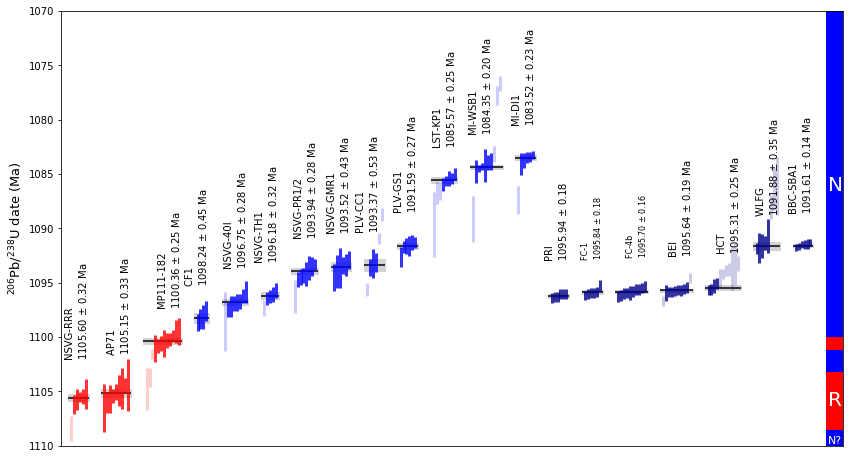

In [50]:
fig, ax, x_positions = plot_dates(MCR_geochron.U_Pb_zircon_dates, MCR_geochron.U_Pb_zircon_2sigmas, 
                                  MCR_geochron.U_Pb_zircon_include, 
                                  MCR_geochron.U_Pb_sample_mean, MCR_geochron.U_Pb_sample_2sigma, 
                                  colors, labels, legend=False, figsize=(14,8))

max_x_value = 240
ax.set_ylim(1110,1070)
ax.set_xlim(0,max_x_value)
ax.set_xticks([])
ax.text(x_positions[0],1105.60-3.5,'NSVG-RRR \n1105.60 $\pm$ 0.32 Ma',size='10',horizontalalignment='right',
        verticalalignment='bottom',multialignment='left',rotation=90)
ax.text(x_positions[1],1105.15-3.5,'AP71 \n1105.15 $\pm$ 0.33 Ma',size='10',horizontalalignment='right',
        verticalalignment='bottom',multialignment='left',rotation=90)
ax.text(x_positions[2],1100.36-3,'MP111-182 \n1100.36 $\pm$ 0.25 Ma',size='10',horizontalalignment='right',
        verticalalignment='bottom',multialignment='left',rotation=90)
ax.text(x_positions[3],1098.24-3,'CF1 \n1098.24 $\pm$ 0.45 Ma',size='10',horizontalalignment='right',
        verticalalignment='bottom',multialignment='left',rotation=90)
ax.text(x_positions[4],1096.75-3,'NSVG-40I \n1096.75 $\pm$ 0.28 Ma',size='10',horizontalalignment='right',
        verticalalignment='bottom',multialignment='left',rotation=90)
ax.text(x_positions[5],1096.18-3,'NSVG-TH1 \n1096.18 $\pm$ 0.32 Ma',size='10',horizontalalignment='right',
        verticalalignment='bottom',multialignment='left',rotation=90)
ax.text(x_positions[6],1093.94-3,'NSVG-PR1/2 \n1093.94 $\pm$ 0.28 Ma',size='10',horizontalalignment='right',
        verticalalignment='bottom',multialignment='left',rotation=90)
ax.text(x_positions[7],1093.52-3,'NSVG-GMR1 \n1093.52 $\pm$ 0.43 Ma',size='10',horizontalalignment='right',
        verticalalignment='bottom',multialignment='left',rotation=90)
ax.text(x_positions[8]-1.5,1093.37-3,'PLV-CC1 \n1093.37 $\pm$ 0.53 Ma',size='10',horizontalalignment='right',
        verticalalignment='bottom',multialignment='left',rotation=90)
ax.text(x_positions[9],1091.59-3,'PLV-GS1 \n1091.59 $\pm$ 0.27 Ma',size='10',horizontalalignment='right',
        verticalalignment='bottom',multialignment='left',rotation=90)
ax.text(x_positions[10],1085.57-3,'LST-KP1 \n1085.57 $\pm$ 0.25 Ma',size='10',horizontalalignment='right',
        verticalalignment='bottom',multialignment='left',rotation=90)
ax.text(x_positions[11]-3,MI_WSB1_mean-3,'MI-WSB1 \n1084.35 $\pm$ 0.20 Ma',size='10',horizontalalignment='right',
        verticalalignment='bottom',multialignment='left',rotation=90)
ax.text(x_positions[12],1083.52-3,'MI-DI1 \n1083.52 $\pm$ 0.23 Ma',size='10',horizontalalignment='right',
        verticalalignment='bottom',multialignment='left',rotation=90)
ax.text(x_positions[13],1095.94-3,'PRI \n1095.94 $\pm$ 0.18',size='10',horizontalalignment='right',
        verticalalignment='bottom',multialignment='left',rotation=90)
ax.text(x_positions[14],1095.84-3,'FC-1 \n1095.84 $\pm$ 0.18',size='8',horizontalalignment='right',
        verticalalignment='bottom',multialignment='left',rotation=90)
ax.text(x_positions[15],1095.70-3,'FC-4b \n1095.70 $\pm$ 0.16',size='8',horizontalalignment='right',
        verticalalignment='bottom',multialignment='left',rotation=90)
ax.text(x_positions[16],1095.64-3,'BEI \n1095.64 $\pm$ 0.19 Ma',size='10',horizontalalignment='right',
        verticalalignment='bottom',multialignment='left',rotation=90)
ax.text(x_positions[17],1095.31-3,'HCT \n1095.31 $\pm$ 0.25 Ma',size='10',horizontalalignment='right',
        verticalalignment='bottom',multialignment='left',rotation=90)
ax.text(x_positions[18],1091.88-3,'WLFG \n1091.88 $\pm$ 0.35 Ma',size='10',horizontalalignment='right',
        verticalalignment='bottom',multialignment='left',rotation=90)
ax.text(x_positions[19],1091.61-3,'BBC-SBA1 \n1091.61 $\pm$ 0.14 Ma',size='10',horizontalalignment='right',
        verticalalignment='bottom',multialignment='left',rotation=90)

pre_Alona_Bay_N = matplotlib.patches.Rectangle((max_x_value-5, 1108.5), 5, 1.5, color='blue')
ax.add_patch(pre_Alona_Bay_N)
ax.text(max_x_value-4.5, 1109.5,'N?',size='11',color='white',verticalalignment='center')

Alona_Bay_R = matplotlib.patches.Rectangle((max_x_value-5, 1103.1), 5, 5.4, color='red')
ax.add_patch(Alona_Bay_R)
ax.text(max_x_value-4.5, 1105.8,'R',size='20',color='white',verticalalignment='center')
# ax.text(158.5, 1107.5,'Alona Bay\nReversed\nPolarity Zone',size='11',horizontalalignment='right')

Flour_Bay_N = matplotlib.patches.Rectangle((max_x_value-5, 1101.1), 5, 2, color='blue')
ax.add_patch(Flour_Bay_N)
Flour_Bay_R = matplotlib.patches.Rectangle((max_x_value-5, 1099.9), 5, 1.2, color='red')
ax.add_patch(Flour_Bay_R)
# ax.text(158.5, 1102.5,'Flour Bay\nPolarity Zones',size='11',horizontalalignment='right')

Portage_Lake_N = matplotlib.patches.Rectangle((max_x_value-5, 1070), 5, 29.9, color='blue')
ax.add_patch(Portage_Lake_N)
ax.text(max_x_value-4.5, 1086,'N',size='20',color='white',verticalalignment='center')
# ax.text(158.5, 1094,'Portage Lake\nNormal\nPolarity Zone',size='11',horizontalalignment='right')

plt.show(fig)

## Generate geochronology figure for manuscript

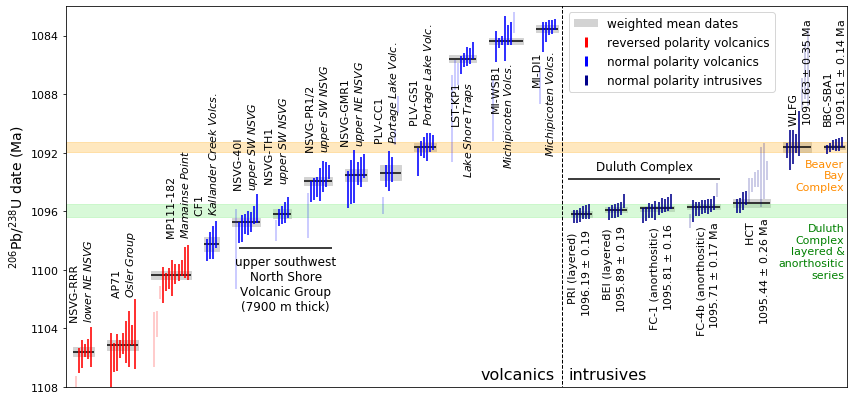

In [51]:
fig, ax, x_positions = plot_dates(MCR_geochron.U_Pb_zircon_dates, MCR_geochron.U_Pb_zircon_2sigmas, 
                                  MCR_geochron.U_Pb_zircon_include, 
                                  MCR_geochron.U_Pb_sample_mean, MCR_geochron.U_Pb_sample_2sigma, 
                                  colors, labels, legend=False, figsize=(14,7), lineweight=2)

max_x_value = 231.5
ax.set_ylim(1108,1082)
ax.set_xlim(0,max_x_value)
ax.set_xticks([])
ax.set_yticks(np.arange(1084,1110,4))
ax.set_yticklabels(np.arange(1084,1110,4),fontsize=11)
ax.yaxis.label.set_size(14)

ax.text(x_positions[0],1105.60-2,'NSVG-RRR \n$\mathit{lower\;NE\;NSVG}$',size='11',horizontalalignment='right',
         verticalalignment='bottom',multialignment='left',rotation=90)
ax.text(x_positions[1],1105.15-3.25,'AP71 \n$\mathit{Osler\;Group}$',size='11',horizontalalignment='right',
        verticalalignment='bottom',multialignment='left',rotation=90)
ax.text(x_positions[2],1100.36-2.5,'MP111-182 \n$\mathit{Mamainse\;Point}$',size='11',horizontalalignment='right',
        verticalalignment='bottom',multialignment='left',rotation=90)
ax.text(x_positions[3],1098.24-2,'CF1 \n$\mathit{Kallander\;Creek\;Volcs.}$',size='11',horizontalalignment='right',
        verticalalignment='bottom',multialignment='left',rotation=90)
ax.text(x_positions[4],1096.75-2.2,'NSVG-40I \n$\mathit{upper\;SW\;NSVG}$',size='11',horizontalalignment='right',
        verticalalignment='bottom',multialignment='left',rotation=90)
ax.text(x_positions[5],1096.18-2,'NSVG-TH1 \n$\mathit{upper\;SW\;NSVG}$',size='11',horizontalalignment='right',
        verticalalignment='bottom',multialignment='left',rotation=90)
ax.text(x_positions[6],1093.94-2,'NSVG-PR1/2 \n$\mathit{upper\;SW\;NSVG}$',size='11',horizontalalignment='right',
        verticalalignment='bottom',multialignment='left',rotation=90)
ax.text(x_positions[7],1093.52-2,'NSVG-GMR1 \n$\mathit{upper\;NE\;NSVG}$',size='11',horizontalalignment='right',
        verticalalignment='bottom',multialignment='left',rotation=90)
ax.text(x_positions[8],1093.37-2,'PLV-CC1 \n$\mathit{Portage\;Lake\;Volc.}$',size='11',horizontalalignment='right',
        verticalalignment='bottom',multialignment='left',rotation=90)
ax.text(x_positions[9],1091.59-1.5,'PLV-GS1 \n$\mathit{Portage\;Lake\;Volc.}$',size='11',horizontalalignment='right',
        verticalalignment='bottom',multialignment='left',rotation=90)
ax.text(x_positions[10],1085.57+1.5,'LST-KP1\n$\mathit{Lake\;Shore\;Traps}$',size='11',horizontalalignment='right',
        verticalalignment='top',multialignment='right',rotation=90)
ax.text(x_positions[11]-2,MI_WSB1_mean+1.5,'MI-WSB1\n$\mathit{Michipicoten\;Volcs.}$',size='11',horizontalalignment='right',
        verticalalignment='top',multialignment='right',rotation=90)
ax.text(x_positions[12],1083.52+1.5,'MI-DI1\n$\mathit{Michipicoten\;Volcs.}$',size='11',horizontalalignment='right',
        verticalalignment='top',multialignment='right',rotation=90)

ax.text(x_positions[13],1096.19+1,'PRI (layered) \n1096.19 $\pm$ 0.19',size='11',horizontalalignment='right',
        verticalalignment='top',multialignment='right',rotation=90)
ax.text(x_positions[14],1095.89+1,'BEI (layered) \n1095.89 $\pm$ 0.19',size='11',horizontalalignment='right',
        verticalalignment='top',multialignment='right',rotation=90)
ax.text(x_positions[15],1095.81+1,'FC-1 (anorthositic) \n1095.81 $\pm$ 0.16',size='11',horizontalalignment='right',
        verticalalignment='top',multialignment='right',rotation=90)
ax.text(x_positions[16],1095.71+1,'FC-4b (anorthositic) \n1095.71 $\pm$ 0.17 Ma',size='11',horizontalalignment='right',
        verticalalignment='top',multialignment='right',rotation=90)
ax.text(x_positions[17],1095.44+1,'HCT \n1095.44 $\pm$ 0.26 Ma',size='11',horizontalalignment='right',
        verticalalignment='top',multialignment='right',rotation=90)
ax.text(x_positions[18]+0.5,1091.63-1.5,'WLFG \n1091.63 $\pm$ 0.35 Ma',size='11',horizontalalignment='right',
        verticalalignment='bottom',multialignment='left',rotation=90)
ax.text(x_positions[19]+0.5,1091.61-1.5,'BBC-SBA1\n1091.61 $\pm$ 0.14 Ma',size='11',horizontalalignment='right',
        verticalalignment='bottom',multialignment='left',rotation=90)

rectangle = matplotlib.patches.Rectangle((0,1095.71 - 0.17),300, (1096.19 + 0.19)-(1095.71 - 0.17), color='lightgreen',alpha=0.35)
ax.add_patch(rectangle)
ax.text(max_x_value-0.75, 1096.19 + 0.19 + 0.45, 'Duluth\nComplex\nlayered &\nanorthositic\nseries', color='green' ,size='11',
        verticalalignment='top',horizontalalignment='right')

rectangle = matplotlib.patches.Rectangle((0,1091.63 - 0.35),300, (1091.63 + 0.35)-(1091.63 - 0.35), color='orange',alpha=0.25)
ax.add_patch(rectangle)
ax.text(max_x_value-0.75, 1091.63 + 0.35 + 0.45, 'Beaver\nBay\nComplex', color='darkorange' ,size='11',
        verticalalignment='top', horizontalalignment='right')

ext_int_split = 147
plt.vlines(ext_int_split,1110,1000,linewidths=1,linestyle='--')
plt.text(ext_int_split-2,1107.5,'volcanics',horizontalalignment='right',fontsize=16)
plt.text(ext_int_split+2,1107.5,'intrusives',horizontalalignment='left',fontsize=16)

plt.hlines(1098.5,x_positions[3]+6,x_positions[6])
plt.text((x_positions[3]+6+x_positions[6])/2,1099,'upper southwest\nNorth Shore\nVolcanic Group\n(7900 m thick)',verticalalignment='top',
         horizontalalignment='center',fontsize=12)

plt.hlines(1093.8,x_positions[12]+3,x_positions[16])
plt.text((x_positions[12]+3+x_positions[16])/2,1093.2,'Duluth Complex',horizontalalignment='center',fontsize=12)


legend_elements = [Patch(facecolor='lightgrey', edgecolor=None,
                         label='weighted mean dates'),
                   Line2D([], [],  marker='|', linestyle='None', color='red', label='reversed polarity volcanics',
                          markerfacecolor='k', markersize=10, markeredgewidth=3),
                   Line2D([], [],  marker='|', linestyle='None', color='blue', label='normal polarity volcanics',
                          markerfacecolor='k', markersize=10, markeredgewidth=3),
                   Line2D([], [],  marker='|', linestyle='None', color='darkblue', label='normal polarity intrusives',
                          markerfacecolor='k', markersize=10, markeredgewidth=3)]

plt.legend(handles=legend_elements, loc='upper right',
           bbox_to_anchor=(.915,1), fancybox=True, fontsize = 12)

plt.savefig('../manuscript/figures/MCR_dates.pdf',bbox_inches='tight')
plt.show(fig)

Duration of Duluth Complex Magmatism

In [52]:
PRI_mean - FC4b_mean

0.4800000000000182

In [53]:
PRI_mean + PRI_2sigma

1096.38

In [54]:
FC4b_mean - FC4b_2sigma

1095.54

In [55]:
(PRI_mean + PRI_2sigma) - (FC4b_mean - FC4b_2sigma)

0.8400000000001455

# Duluth Complex area

The area of the Duluth Complex can be calculated from the polygons of the S21 MN Geological map.

In [57]:
MN_geo_polygons = pd.read_csv('../data/geology/MN_geology_polygons.csv')
MN_geo_polygons.head()

,AREA,PERIMETER,TYPE,GCM_CODE,GEOC_SRC,GEOC_DATE,UTME,UTMN,UTM_ZONE,MAPLABEL,DESCRIPTN,UNIT_NAME,TERRANE,ERA,SUBDIV,AREA_CALC
0,1.055855e+06,5101.682095,BG,AB,MGS,20101215,344100,5471393,15,Amv,Mafic metavolcanic rocks; minor volcaniclastic...,NaN,Wabigoon subprovince,Neoarchean,Superior Province,1056082.0
1,4.058488e+06,8978.228037,BG,AB,MGS,20101215,344483,5470243,15,Asd,"Syenitic, monzodioritic, or dioritic pluton",NaN,massive to weakly foliated,Neoarchean,Superior Province,4059328.0
2,5.945258e+07,63606.085456,BG,AB,MGS,20101215,353379,5466664,15,Agr,Granitic intrusion,NaN,massive to weakly foliated,Neoarchean,Superior Province,59467613.0
3,7.830187e+06,23317.507491,BG,AB,MGS,20101215,355501,5469271,15,Amv,Mafic metavolcanic rocks; minor volcaniclastic...,NaN,Wabigoon subprovince,Neoarchean,Superior Province,7832350.0
4,2.492758e+07,50540.399729,BG,AB,MGS,20101215,353660,5465002,15,Avs,Volcanic and volcaniclastic rocks; felsic to i...,NaN,Wabigoon subprovince,Neoarchean,Superior Province,24934273.0


In [58]:
anortho_polygons = MN_geo_polygons[MN_geo_polygons.MAPLABEL == "Mau"]
layered_polygons = MN_geo_polygons[(MN_geo_polygons.MAPLABEL == "Mlc") | (MN_geo_polygons.MAPLABEL == "Mlf") | 
                                   (MN_geo_polygons.MAPLABEL == "Mlg") | (MN_geo_polygons.MAPLABEL == "Mlt")]
early_gabbro_polygons = MN_geo_polygons[MN_geo_polygons.MAPLABEL == "Mge"]
felsic_series_polygons = MN_geo_polygons[MN_geo_polygons.MAPLABEL == "Mfg"]
HCT_polygons = MN_geo_polygons[(MN_geo_polygons.MAPLABEL == "Mbt")]
BBC_polygons = MN_geo_polygons[(MN_geo_polygons.MAPLABEL == "Mbd") | (MN_geo_polygons.MAPLABEL == "Mbf")|
                                (MN_geo_polygons.MAPLABEL == "Mbg")]

Calculate the area in square kilometers

In [59]:
anorthositic_area = anortho_polygons.AREA.sum()/(1000*1000)
anorthositic_area

2312.0925388010287

In [60]:
layered_area = layered_polygons.AREA.sum()/(1000*1000)
layered_area

2568.5970853061776

In [61]:
early_gabbro_area = early_gabbro_polygons.AREA.sum()/(1000*1000)
early_gabbro_area

260.0774290471

In [62]:
felsic_series_area = felsic_series_polygons.AREA.sum()/(1000*1000)
felsic_series_area

490.84322160180295

In [63]:
anorthositic_area + layered_area + early_gabbro_area + felsic_series_area

5631.610274756109

In [64]:
HCT_area = HCT_polygons.AREA.sum()/(1000*1000)
HCT_area

150.190668502

In [65]:
BBC_area = BBC_polygons.AREA.sum()/(1000*1000)
BBC_area

1035.8102578461144

In [66]:
Duluth_Complex_strike_length = 220
Duluth_Complex_surface_width = 100
Duluth_Complex_dip = 20
Duluth_Complex_as_the_crow_flies = 30

Duluth_Complex_width = Duluth_Complex_surface_width/np.cos(np.deg2rad(Duluth_Complex_dip))
Duluth_Complex_thickness = np.sin(np.deg2rad(Duluth_Complex_dip))*Duluth_Complex_as_the_crow_flies
Duluth_Complex_thickness

10.260604299770062

In [67]:
Duluth_Complex_volume = Duluth_Complex_width*Duluth_Complex_thickness*Duluth_Complex_strike_length
Duluth_Complex_volume

240220.35461569353

In [68]:
Duluth_Complex_volume/600000

0.40036725769282255

In [73]:
Beck_Anorthositic_filtered

,site,location,samples,dir_dec,dir_inc,dir_k,dir_n_samples,dir_n_specimens,dir_n_total_specimens,dir_tilt_correction,blanket_demag_level_af,dir_alpha95,lat,lon,geologic_classes,geologic_types,lithologies,method_codes,result_quality,result_type,age,age_unit,citations,description,dec_tc,inc_tc,paleolatitude,vgp_lat,vgp_lon,vgp_lat_rev,vgp_lon_rev
0,18,Anorthositic series,6B095:6B096:6B097:6B098:6B099:6B100:6B101,279.0,37.5,91.0,7,7,7,0,0.06,5.547002,46.75,-92.17,Intrusive:Igneous,Pluton,Gabbro,LT-AF-Z:DE-BLANKET,g,i,1090,Ma,10.1029/jb074i008p02002:Beck (1969),Quarry Containing heterogeneous coarse to very...,284.115300,54.526248,35.055567,33.720412,195.187570,-33.720412,15.187570
10,222,Anorthositic series,K133.1:K133.2:K133.3:K133.4:K133.5,270.5,43.0,74.5,5,5,5,0,0.06,7.253789,46.76,-92.15,Intrusive:Igneous,Pluton,Gabbro,LT-AF-Z:DE-BLANKET,g,i,1090,Ma,10.1029/jb074i008p02002:Beck (1969),"Very coarse-grained, massive gabbro",272.964238,60.591129,41.574177,30.658536,207.566023,-30.658536,27.566023
